In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

print("All libraries imported successfully")


# Load the dataset
df = pd.read_csv('./data/Mall_Customers.csv')

print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

All libraries imported successfully
Dataset shape: (200, 5)
Columns: ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']


In [66]:
# Display basic information

print("DATASET OVERVIEW")

print(f"\nDataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")


print("FIRST 5 ROWS")
print("=" * 50)
print(df.head())


print("COLUMN NAMES AND DATA TYPES")
print("=" * 50)
print(df.info())

print("\n" + "=" * 50)
print("CHECKING FOR MISSING VALUES")
print("=" * 50)
print(df.isnull().sum())


print("STATISTICAL SUMMARY")

print(df.describe())

DATASET OVERVIEW

Dataset shape: (200, 10)
Number of rows: 200
Number of columns: 10
FIRST 5 ROWS
   CustomerID  Gender  Age  Annual_Income_k  Spending_Score  Annual_Income  \
0           1    Male   19               15              39          15000   
1           2    Male   21               15              81          15000   
2           3  Female   20               16               6          16000   
3           4  Female   23               16              77          16000   
4           5  Female   31               17              40          17000   

   Cluster                Cluster_Name  Hierarchical_Cluster  DBSCAN_Cluster  
0        4     Price-Sensitive Segment                     4               0  
1        2  High-Engagement Low-Income                     3               0  
2        4     Price-Sensitive Segment                     4               0  
3        2  High-Engagement Low-Income                     3               0  
4        4     Price-Sensitive Segment

In [4]:

# Load data
df = pd.read_csv('./data/Mall_Customers.csv')

# Rename columns for easier handling
df.rename(columns={
    'Annual Income (k$)': 'Annual_Income_k',
    'Spending Score (1-100)': 'Spending_Score'
}, inplace=True)

# Convert Annual Income to actual figures
df['Annual_Income'] = df['Annual_Income_k'] * 1000

# Display verification
print("Data loaded and cleaned successfully!")
print(f"Shape: {df.shape}")
print("\nColumns:", df.columns.tolist())
print("\nFirst few rows:")
print(df.head())

Data loaded and cleaned successfully!
Shape: (200, 6)

Columns: ['CustomerID', 'Gender', 'Age', 'Annual_Income_k', 'Spending_Score', 'Annual_Income']

First few rows:
   CustomerID  Gender  Age  Annual_Income_k  Spending_Score  Annual_Income
0           1    Male   19               15              39          15000
1           2    Male   21               15              81          15000
2           3  Female   20               16               6          16000
3           4  Female   23               16              77          16000
4           5  Female   31               17              40          17000


In [ ]:
# Displaying cleaned dataset
print("=" * 60)
print("CLEANED DATASET - FIRST 10 ROWS")
print("=" * 60)
print(df.head(10))
print()

# Check data types again
print("=" * 60)
print("DATA TYPES AFTER CLEANING")
print("=" * 60)
print(df.dtypes)
print()

# Final structure
print("=" * 60)
print("FINAL DATASET INFO")
print("=" * 60)
print(df.info())

CLEANED DATASET - FIRST 10 ROWS
   CustomerID  Gender  Age  Annual_Income_k  Spending_Score  Annual_Income
0           1    Male   19               15              39          15000
1           2    Male   21               15              81          15000
2           3  Female   20               16               6          16000
3           4  Female   23               16              77          16000
4           5  Female   31               17              40          17000
5           6  Female   22               17              76          17000
6           7  Female   35               18               6          18000
7           8  Female   23               18              94          18000
8           9    Male   64               19               3          19000
9          10  Female   30               19              72          19000

DATA TYPES AFTER CLEANING
CustomerID          int64
Gender             object
Age                 int64
Annual_Income_k     int64
Spending_Sco

In [67]:
# Display all columns and decide what to use
print("=" * 60)
print("COLUMNS AVAILABLE FOR CLUSTERING")
print("=" * 60)
print("\nColumn breakdown:")
print("1. CustomerID - Not useful (just an identifier)")
print("2. Gender - Categorical (we can encode this)")
print("3. Age - Useful")
print("4. Annual_Income_k - Original (in thousands)")
print("5. Spending_Score - Useful")
print("6. Annual_Income - New (in actual dollars)")
print()



COLUMNS AVAILABLE FOR CLUSTERING

Column breakdown:
1. CustomerID - Not useful (just an identifier)
2. Gender - Categorical (we can encode this)
3. Age - Useful
4. Annual_Income_k - Original (in thousands)
5. Spending_Score - Useful
6. Annual_Income - New (in actual dollars)



In [69]:
# Drop CustomerID and keep Annual_Income (not Annual_Income_k)
print("Columns we'll use for clustering:")
print("- Age")
print("- Annual_Income (actual dollars)")
print("- Spending_Score")
print("- Gender (will be encoded)")

Columns we'll use for clustering:
- Age
- Annual_Income (actual dollars)
- Spending_Score
- Gender (will be encoded)


In [7]:
# Select features for clustering
# We'll start with Income and Spending Score (most important for segmentation)
features_to_use = ['Annual_Income', 'Spending_Score']

# Create a new dataframe with only these features
X = df[features_to_use].copy()

print("=" * 60)
print("FEATURES SELECTED FOR CLUSTERING")
print("=" * 60)
print(X.head(10))
print()
print(f"Shape of feature matrix: {X.shape}")
print()
print("Statistical summary:")
print(X.describe())

FEATURES SELECTED FOR CLUSTERING
   Annual_Income  Spending_Score
0          15000              39
1          15000              81
2          16000               6
3          16000              77
4          17000              40
5          17000              76
6          18000               6
7          18000              94
8          19000               3
9          19000              72

Shape of feature matrix: (200, 2)

Statistical summary:
       Annual_Income  Spending_Score
count     200.000000      200.000000
mean    60560.000000       50.200000
std     26264.721165       25.823522
min     15000.000000        1.000000
25%     41500.000000       34.750000
50%     61500.000000       50.000000
75%     78000.000000       73.000000
max    137000.000000       99.000000


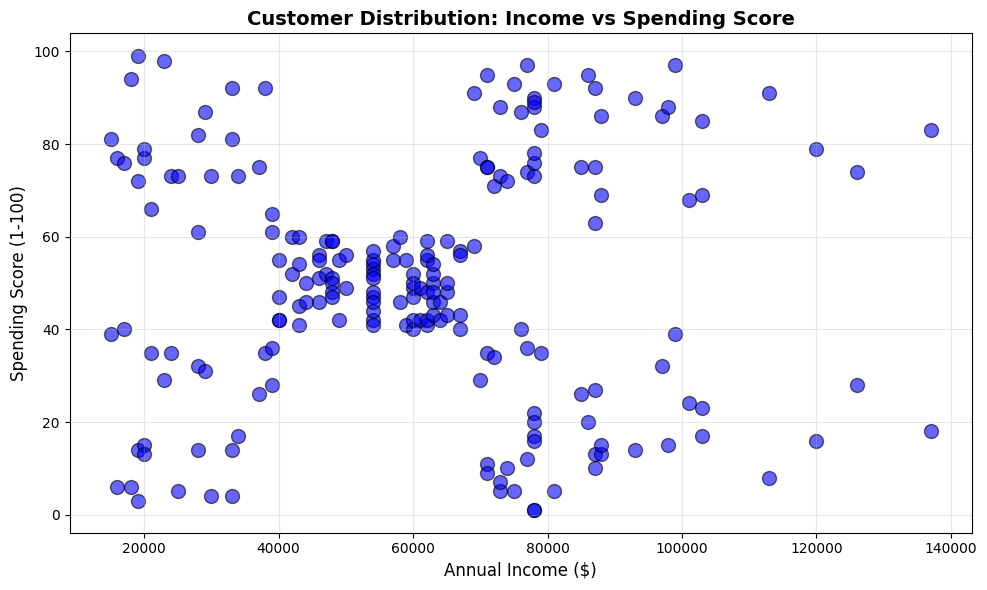

In [8]:
# Visualize Annual Income vs Spending Score
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual_Income'], df['Spending_Score'], alpha=0.6, s=100, c='blue', edgecolors='black')
plt.xlabel('Annual Income ($)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.title('Customer Distribution: Income vs Spending Score', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



In [9]:
# Check the scale difference
print("=" * 60)
print("SCALE COMPARISON (Before Scaling)")
print("=" * 60)
print(f"Annual Income range: ${X['Annual_Income'].min():,.0f} to ${X['Annual_Income'].max():,.0f}")
print(f"Spending Score range: {X['Spending_Score'].min()} to {X['Spending_Score'].max()}")
print()
print(f"Annual Income mean: ${X['Annual_Income'].mean():,.0f}")
print(f"Spending Score mean: {X['Spending_Score'].mean():.2f}")
print()

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
X_scaled = scaler.fit_transform(X)

# Convert back to dataframe for easier viewing
X_scaled_df = pd.DataFrame(X_scaled, columns=['Annual_Income_scaled', 'Spending_Score_scaled'])

print("=" * 60)
print("AFTER SCALING (Standardized)")
print("=" * 60)
print(X_scaled_df.head(10))
print()
print("Scaled statistics:")
print(X_scaled_df.describe())

SCALE COMPARISON (Before Scaling)
Annual Income range: $15,000 to $137,000
Spending Score range: 1 to 99

Annual Income mean: $60,560
Spending Score mean: 50.20

AFTER SCALING (Standardized)
   Annual_Income_scaled  Spending_Score_scaled
0             -1.738999              -0.434801
1             -1.738999               1.195704
2             -1.700830              -1.715913
3             -1.700830               1.040418
4             -1.662660              -0.395980
5             -1.662660               1.001596
6             -1.624491              -1.715913
7             -1.624491               1.700384
8             -1.586321              -1.832378
9             -1.586321               0.846310

Scaled statistics:
       Annual_Income_scaled  Spending_Score_scaled
count          2.000000e+02           2.000000e+02
mean          -1.421085e-16          -1.465494e-16
std            1.002509e+00           1.002509e+00
min           -1.738999e+00          -1.910021e+00
25%           -7.

In [70]:
# Calculate WCSS (Within-Cluster Sum of Squares) for different numbers of clusters
wcss = []
K_range = range(1, 11)

print("Calculating optimal number of clusters...")
print("Testing K from 1 to 10...")
print()

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    print(f"K={k}: WCSS = {kmeans.inertia_:.2f}")



Calculating optimal number of clusters...
Testing K from 1 to 10...

K=1: WCSS = 400.00
K=2: WCSS = 269.69
K=3: WCSS = 157.70
K=4: WCSS = 108.92
K=5: WCSS = 65.57
K=6: WCSS = 55.06
K=7: WCSS = 44.86
K=8: WCSS = 37.23
K=9: WCSS = 32.39
K=10: WCSS = 29.98


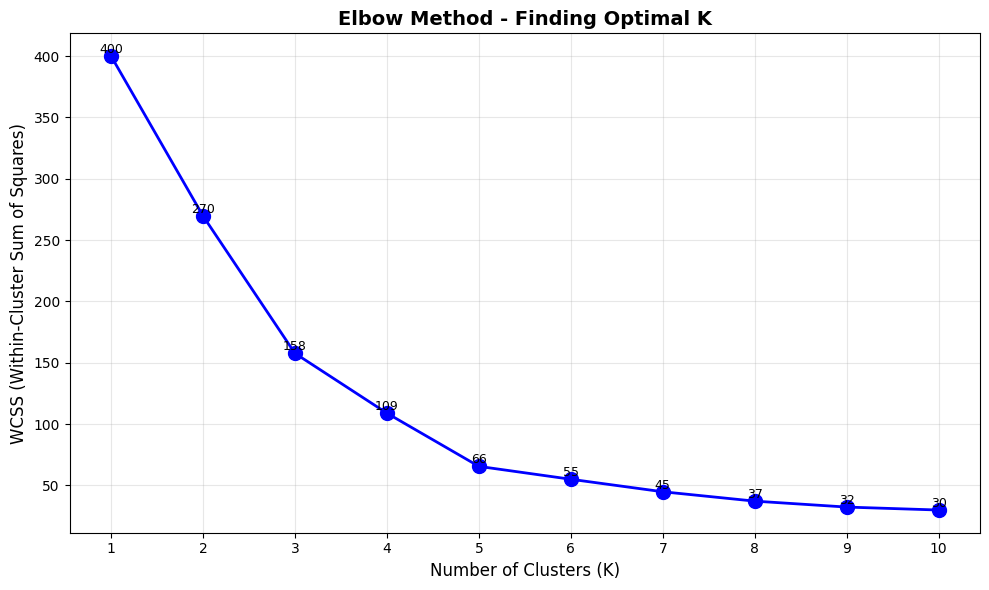

In [11]:
# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, wcss, marker='o', linewidth=2, markersize=10, color='blue')
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=12)
plt.title('Elbow Method - Finding Optimal K', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(K_range)

# Add annotations
for i, k in enumerate(K_range):
    plt.text(k, wcss[i], f'{wcss[i]:.0f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


In [71]:
# Calculate silhouette scores for different K values
silhouette_scores = []
K_range_silhouette = range(2, 11)  # Silhouette score needs at least 2 clusters

print()

for k in K_range_silhouette:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"K={k}: Silhouette Score = {silhouette_avg:.4f}")


K=2: Silhouette Score = 0.3213
K=3: Silhouette Score = 0.4666
K=4: Silhouette Score = 0.4939
K=5: Silhouette Score = 0.5547
K=6: Silhouette Score = 0.5399
K=7: Silhouette Score = 0.5281
K=8: Silhouette Score = 0.4552
K=9: Silhouette Score = 0.4571
K=10: Silhouette Score = 0.4432


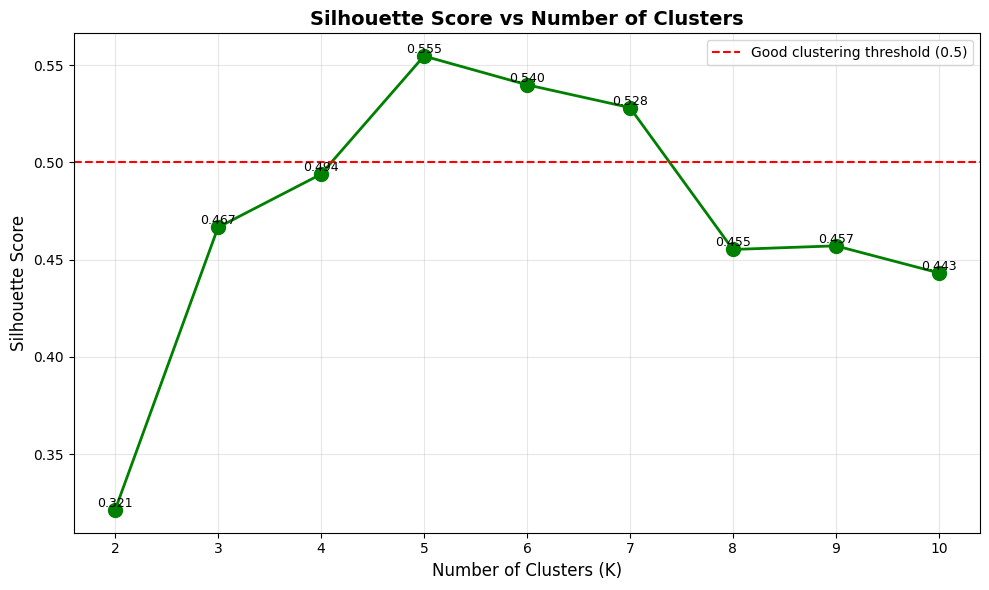


Optimal K based on Silhouette Score: 5
Maximum Silhouette Score: 0.5547


In [13]:
# Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(K_range_silhouette, silhouette_scores, marker='o', linewidth=2, markersize=10, color='green')
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Silhouette Score vs Number of Clusters', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(K_range_silhouette)

# Add annotations
for i, k in enumerate(K_range_silhouette):
    plt.text(k, silhouette_scores[i], f'{silhouette_scores[i]:.3f}', 
             ha='center', va='bottom', fontsize=9)

# Add a horizontal line at 0.5 (good clustering threshold)
plt.axhline(y=0.5, color='red', linestyle='--', label='Good clustering threshold (0.5)')
plt.legend()

plt.tight_layout()
plt.show()

# Find the optimal K based on silhouette score
optimal_k = K_range_silhouette[silhouette_scores.index(max(silhouette_scores))]
print(f"\nOptimal K based on Silhouette Score: {optimal_k}")
print(f"Maximum Silhouette Score: {max(silhouette_scores):.4f}")

In [72]:
# Set the optimal number of clusters
optimal_k = 5

print("=" * 60)
print(f"PERFORMING K-MEANS CLUSTERING WITH K={optimal_k}")
print("=" * 60)
print()

# Create and fit the final K-Means model
kmeans_final = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
kmeans_final.fit(X_scaled)

# Get cluster labels for each customer
cluster_labels = kmeans_final.labels_

# Add cluster labels to original dataframe
df['Cluster'] = cluster_labels


print(f"Total customers: {len(df)}")
print()

# Count customers in each cluster
print("Customers per cluster:")
cluster_counts = df['Cluster'].value_counts().sort_index()
for cluster_id, count in cluster_counts.items():
    print(f"Cluster {cluster_id}: {count} customers ({count/len(df)*100:.1f}%)")

PERFORMING K-MEANS CLUSTERING WITH K=5

Total customers: 200

Customers per cluster:
Cluster 0: 81 customers (40.5%)
Cluster 1: 39 customers (19.5%)
Cluster 2: 22 customers (11.0%)
Cluster 3: 35 customers (17.5%)
Cluster 4: 23 customers (11.5%)


In [15]:
# Get detailed statistics for each cluster
print("\n" + "=" * 60)
print("CLUSTER ANALYSIS - DETAILED STATISTICS")
print("=" * 60)
print()

for cluster_id in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster_id]
    
    print(f"\n{'='*50}")
    print(f"CLUSTER {cluster_id} - {len(cluster_data)} customers")
    print(f"{'='*50}")
    
    print(f"Age:")
    print(f"  Mean: {cluster_data['Age'].mean():.1f} years")
    print(f"  Range: {cluster_data['Age'].min()}-{cluster_data['Age'].max()} years")
    
    print(f"\nAnnual Income:")
    print(f"  Mean: ${cluster_data['Annual_Income'].mean():,.0f}")
    print(f"  Range: ${cluster_data['Annual_Income'].min():,.0f} - ${cluster_data['Annual_Income'].max():,.0f}")
    
    print(f"\nSpending Score:")
    print(f"  Mean: {cluster_data['Spending_Score'].mean():.1f}")
    print(f"  Range: {cluster_data['Spending_Score'].min()}-{cluster_data['Spending_Score'].max()}")
    
    print(f"\nGender Distribution:")
    gender_dist = cluster_data['Gender'].value_counts()
    for gender, count in gender_dist.items():
        print(f"  {gender}: {count} ({count/len(cluster_data)*100:.1f}%)")


CLUSTER ANALYSIS - DETAILED STATISTICS


CLUSTER 0 - 81 customers
Age:
  Mean: 42.7 years
  Range: 18-70 years

Annual Income:
  Mean: $55,296
  Range: $39,000 - $76,000

Spending Score:
  Mean: 49.5
  Range: 34-61

Gender Distribution:
  Female: 48 (59.3%)
  Male: 33 (40.7%)

CLUSTER 1 - 39 customers
Age:
  Mean: 32.7 years
  Range: 27-40 years

Annual Income:
  Mean: $86,538
  Range: $69,000 - $137,000

Spending Score:
  Mean: 82.1
  Range: 63-97

Gender Distribution:
  Female: 21 (53.8%)
  Male: 18 (46.2%)

CLUSTER 2 - 22 customers
Age:
  Mean: 25.3 years
  Range: 18-35 years

Annual Income:
  Mean: $25,727
  Range: $15,000 - $39,000

Spending Score:
  Mean: 79.4
  Range: 61-99

Gender Distribution:
  Female: 13 (59.1%)
  Male: 9 (40.9%)

CLUSTER 3 - 35 customers
Age:
  Mean: 41.1 years
  Range: 19-59 years

Annual Income:
  Mean: $88,200
  Range: $70,000 - $137,000

Spending Score:
  Mean: 17.1
  Range: 1-39

Gender Distribution:
  Male: 19 (54.3%)
  Female: 16 (45.7%)

CLUSTER 4 

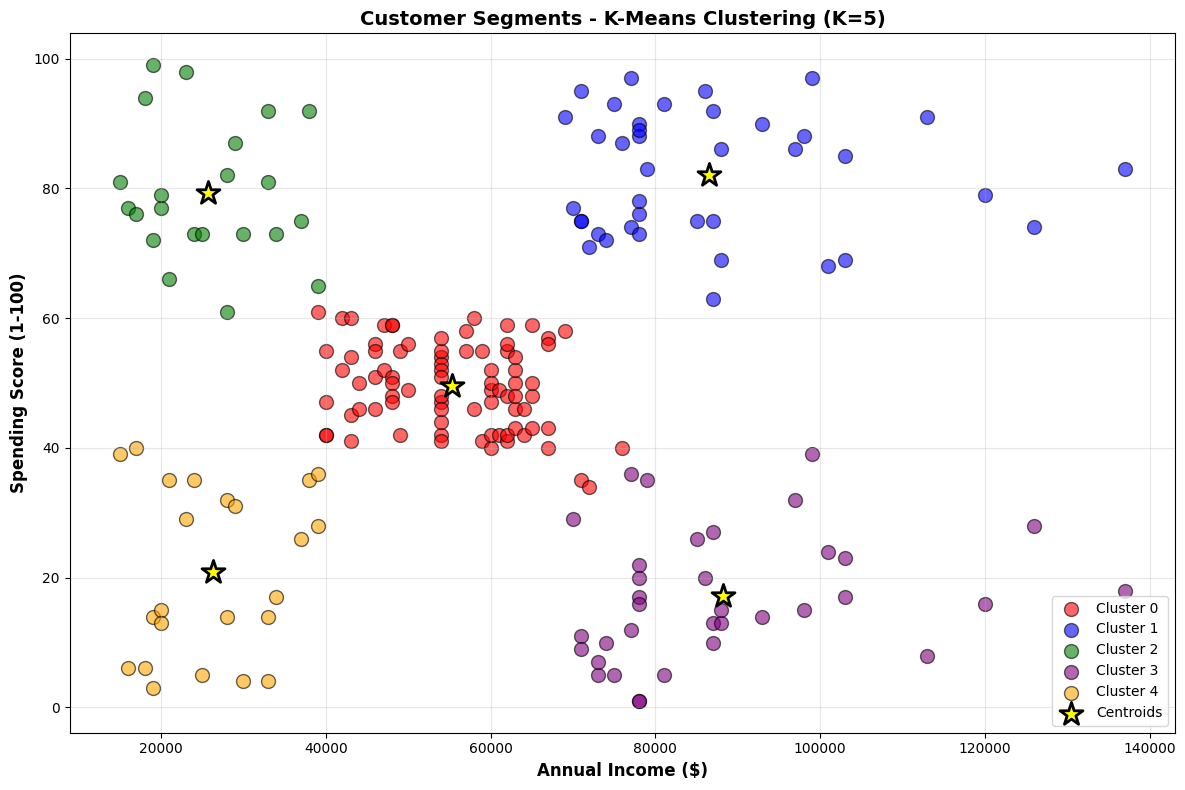

In [16]:
# Create a  visualization of the clusters
plt.figure(figsize=(12, 8))

# Define colors for each cluster
colors = ['red', 'blue', 'green', 'purple', 'orange']

# Plot each cluster with different colors
for cluster_id in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster_id]
    plt.scatter(cluster_data['Annual_Income'], 
                cluster_data['Spending_Score'],
                s=100, 
                c=colors[cluster_id], 
                label=f'Cluster {cluster_id}',
                alpha=0.6,
                edgecolors='black')

# Plot cluster centers
centers = scaler.inverse_transform(kmeans_final.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], 
            s=300, c='yellow', marker='*', 
            edgecolors='black', linewidths=2,
            label='Centroids', zorder=10)

plt.xlabel('Annual Income ($)', fontsize=12, fontweight='bold')
plt.ylabel('Spending Score (1-100)', fontsize=12, fontweight='bold')
plt.title(f'Customer Segments - K-Means Clustering (K={optimal_k})', 
          fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



In [17]:
# Create a summary dataframe for each cluster
cluster_summary = df.groupby('Cluster').agg({
    'Age': 'mean',
    'Annual_Income': 'mean',
    'Spending_Score': 'mean',
    'CustomerID': 'count'
}).round(2)

cluster_summary.columns = ['Avg_Age', 'Avg_Income', 'Avg_Spending_Score', 'Customer_Count']

print("=" * 70)
print("CLUSTER SUMMARY TABLE")
print("=" * 70)
print(cluster_summary)
print()

# Assign meaningful names to each cluster based on characteristics
cluster_names = {
    0: "Middle Income, Average Spenders",
    1: "High Income, High Spenders", 
    2: "Low Income, High Spenders",
    3: "High Income, Low Spenders",
    4: "Low Income, Low Spenders"
}

# Add cluster names to dataframe
df['Cluster_Name'] = df['Cluster'].map(cluster_names)

print("=" * 70)
print("CLUSTER NAMES AND INTERPRETATIONS")
print("=" * 70)

for cluster_id in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster_id]
    print(f"\nCluster {cluster_id}: {cluster_names[cluster_id]}")
    print(f"  Size: {len(cluster_data)} customers ({len(cluster_data)/len(df)*100:.1f}%)")
    print(f"  Avg Income: ${cluster_data['Annual_Income'].mean():,.0f}")
    print(f"  Avg Spending Score: {cluster_data['Spending_Score'].mean():.1f}/100")
    print(f"  Avg Age: {cluster_data['Age'].mean():.1f} years")

CLUSTER SUMMARY TABLE
         Avg_Age  Avg_Income  Avg_Spending_Score  Customer_Count
Cluster                                                         
0          42.72    55296.30               49.52              81
1          32.69    86538.46               82.13              39
2          25.27    25727.27               79.36              22
3          41.11    88200.00               17.11              35
4          45.22    26304.35               20.91              23

CLUSTER NAMES AND INTERPRETATIONS

Cluster 0: Middle Income, Average Spenders
  Size: 81 customers (40.5%)
  Avg Income: $55,296
  Avg Spending Score: 49.5/100
  Avg Age: 42.7 years

Cluster 1: High Income, High Spenders
  Size: 39 customers (19.5%)
  Avg Income: $86,538
  Avg Spending Score: 82.1/100
  Avg Age: 32.7 years

Cluster 2: Low Income, High Spenders
  Size: 22 customers (11.0%)
  Avg Income: $25,727
  Avg Spending Score: 79.4/100
  Avg Age: 25.3 years

Cluster 3: High Income, Low Spenders
  Size: 35 custom

In [18]:
print("\n" + "=" * 70)
print("BUSINESS INSIGHTS AND MARKETING RECOMMENDATIONS")
print("=" * 70)

insights = {
    0: {
        "profile": "Middle Income, Average Spenders (RED)",
        "behavior": "Moderate income with moderate spending habits",
        "strategy": "Standard promotions, loyalty programs, balanced product mix"
    },
    1: {
        "profile": "High Income, High Spenders (BLUE) - PREMIUM SEGMENT",
        "behavior": "Affluent customers who spend generously",
        "strategy": "VIP treatment, premium products, exclusive offers, personalized service"
    },
    2: {
        "profile": "Low Income, High Spenders (GREEN) - OPPORTUNITY SEGMENT",
        "behavior": "Lower income but willing to spend (possibly credit users)",
        "strategy": "Installment plans, credit options, value bundles, retention focus"
    },
    3: {
        "profile": "High Income, Low Spenders (PURPLE) - CHALLENGE SEGMENT",
        "behavior": "Wealthy but conservative/selective shoppers",
        "strategy": "Quality emphasis, targeted campaigns, build trust, showcase value"
    },
    4: {
        "profile": "Low Income, Low Spenders (ORANGE) - BUDGET SEGMENT",
        "behavior": "Price-sensitive customers with limited spending",
        "strategy": "Discounts, budget products, clearance sales, basic necessities"
    }
}

for cluster_id, info in insights.items():
    print(f"\n{'-'*70}")
    print(f"CLUSTER {cluster_id}: {info['profile']}")
    print(f"{'-'*70}")
    print(f"Behavior: {info['behavior']}")
    print(f"Strategy: {info['strategy']}")


BUSINESS INSIGHTS AND MARKETING RECOMMENDATIONS

----------------------------------------------------------------------
CLUSTER 0: Middle Income, Average Spenders (RED)
----------------------------------------------------------------------
Behavior: Moderate income with moderate spending habits
Strategy: Standard promotions, loyalty programs, balanced product mix

----------------------------------------------------------------------
CLUSTER 1: High Income, High Spenders (BLUE) - PREMIUM SEGMENT
----------------------------------------------------------------------
Behavior: Affluent customers who spend generously
Strategy: VIP treatment, premium products, exclusive offers, personalized service

----------------------------------------------------------------------
CLUSTER 2: Low Income, High Spenders (GREEN) - OPPORTUNITY SEGMENT
----------------------------------------------------------------------
Behavior: Lower income but willing to spend (possibly credit users)
Strategy: Install

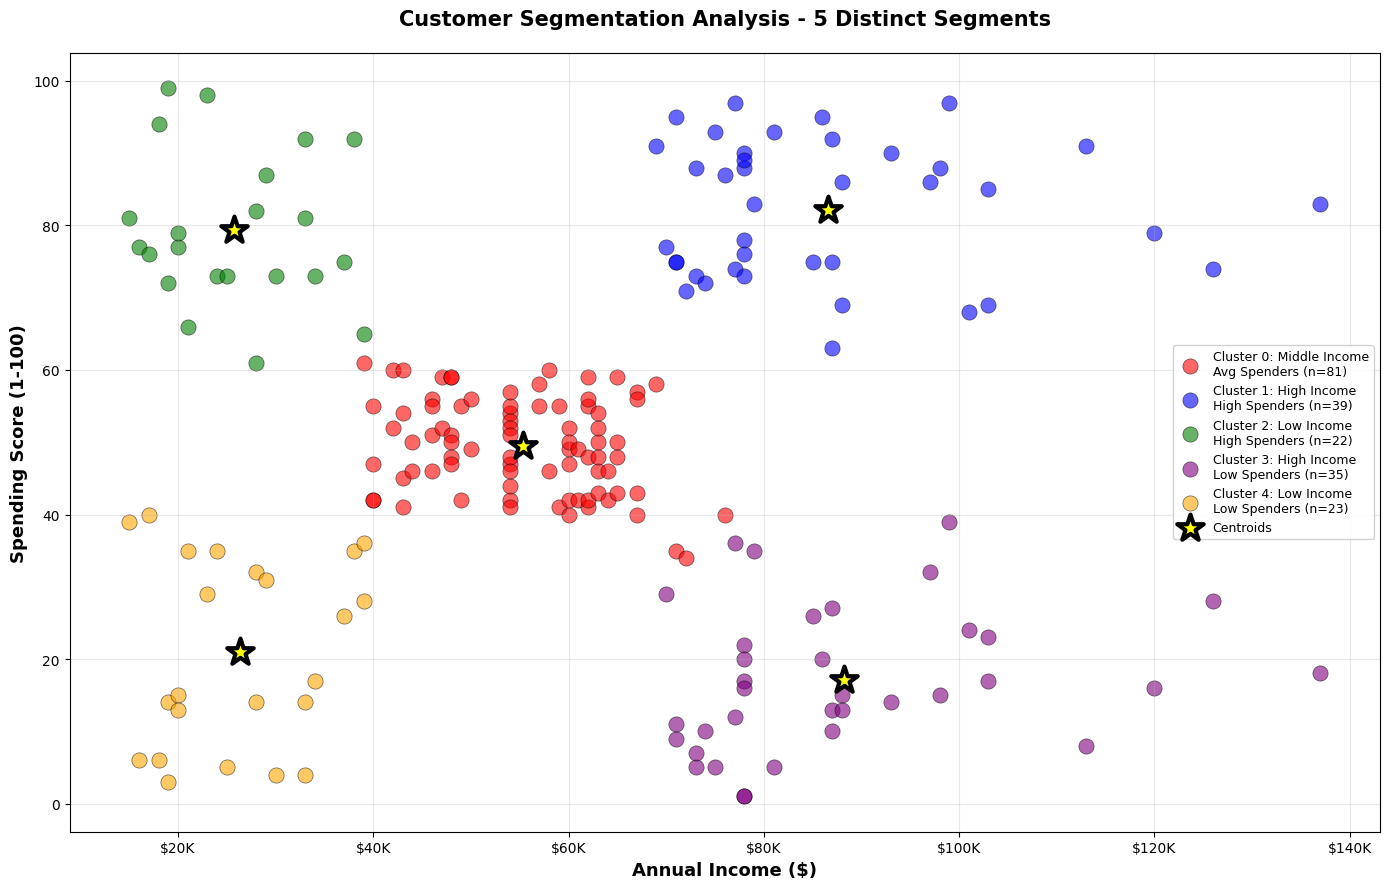

In [73]:
# Create an enhanced visualization with cluster names
plt.figure(figsize=(14, 9))

colors = ['red', 'blue', 'green', 'purple', 'orange']
cluster_labels_viz = [
    'Middle Income\nAvg Spenders',
    'High Income\nHigh Spenders',
    'Low Income\nHigh Spenders',
    'High Income\nLow Spenders',
    'Low Income\nLow Spenders'
]

for cluster_id in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster_id]
    plt.scatter(cluster_data['Annual_Income'], 
                cluster_data['Spending_Score'],
                s=120, 
                c=colors[cluster_id], 
                label=f'Cluster {cluster_id}: {cluster_labels_viz[cluster_id]} (n={len(cluster_data)})',
                alpha=0.6,
                edgecolors='black',
                linewidths=0.5)

# Plot cluster centers
centers = scaler.inverse_transform(kmeans_final.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], 
            s=400, c='yellow', marker='*', 
            edgecolors='black', linewidths=3,
            label='Centroids', zorder=10)

plt.xlabel('Annual Income ($)', fontsize=13, fontweight='bold')
plt.ylabel('Spending Score (1-100)', fontsize=13, fontweight='bold')
plt.title('Customer Segmentation Analysis - 5 Distinct Segments', 
          fontsize=15, fontweight='bold', pad=20)
plt.legend(fontsize=9, loc='best', framealpha=0.9)
plt.grid(True, alpha=0.3)

# Format x-axis to show currency
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

plt.tight_layout()
plt.show()


In [74]:
# Save the clustered data to CSV
output_filename = 'customer_segments_results.csv'
df.to_csv(output_filename, index=False)

print(f"\nResults saved to '{output_filename}'")



Results saved to 'customer_segments_results.csv'


In [21]:
# Detailed cluster statistics
print("=" * 80)
print("FINAL CUSTOMER SEGMENTATION REPORT")
print("=" * 80)
print()

for cluster_id in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster_id]
    
    print(f"\n{'='*80}")
    print(f"CLUSTER {cluster_id}: {cluster_names[cluster_id]}")
    print(f"{'='*80}")
    print(f"Total Customers: {len(cluster_data)} ({len(cluster_data)/len(df)*100:.1f}% of total)")
    print()
    print(f"Demographics:")
    print(f"  Average Age: {cluster_data['Age'].mean():.1f} years")
    print(f"  Age Range: {cluster_data['Age'].min()}-{cluster_data['Age'].max()} years")
    print()
    print(f"Financial Profile:")
    print(f"  Average Income: ${cluster_data['Annual_Income'].mean():,.0f}")
    print(f"  Income Range: ${cluster_data['Annual_Income'].min():,.0f} - ${cluster_data['Annual_Income'].max():,.0f}")
    print()
    print(f"Spending Behavior:")
    print(f"  Average Spending Score: {cluster_data['Spending_Score'].mean():.1f}/100")
    print(f"  Spending Range: {cluster_data['Spending_Score'].min()}-{cluster_data['Spending_Score'].max()}/100")
    print()
    print(f"Gender Distribution:")
    gender_counts = cluster_data['Gender'].value_counts()
    for gender, count in gender_counts.items():
        print(f"  {gender}: {count} ({count/len(cluster_data)*100:.1f}%)")
    print()
    
    # Business recommendation
    print(f"Marketing Strategy:")
    print(f"  {insights[cluster_id]['strategy']}")
    
print("\n" + "=" * 80)

FINAL CUSTOMER SEGMENTATION REPORT


CLUSTER 0: Middle Income, Average Spenders
Total Customers: 81 (40.5% of total)

Demographics:
  Average Age: 42.7 years
  Age Range: 18-70 years

Financial Profile:
  Average Income: $55,296
  Income Range: $39,000 - $76,000

Spending Behavior:
  Average Spending Score: 49.5/100
  Spending Range: 34-61/100

Gender Distribution:
  Female: 48 (59.3%)
  Male: 33 (40.7%)

Marketing Strategy:
  Standard promotions, loyalty programs, balanced product mix

CLUSTER 1: High Income, High Spenders
Total Customers: 39 (19.5% of total)

Demographics:
  Average Age: 32.7 years
  Age Range: 27-40 years

Financial Profile:
  Average Income: $86,538
  Income Range: $69,000 - $137,000

Spending Behavior:
  Average Spending Score: 82.1/100
  Spending Range: 63-97/100

Gender Distribution:
  Female: 21 (53.8%)
  Male: 18 (46.2%)

Marketing Strategy:
  VIP treatment, premium products, exclusive offers, personalized service

CLUSTER 2: Low Income, High Spenders
Total Cu

In [22]:
# Detailed cluster statistics
print("=" * 80)
print("FINAL CUSTOMER SEGMENTATION REPORT")
print("=" * 80)
print()

for cluster_id in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster_id]
    
    print(f"\n{'='*80}")
    print(f"CLUSTER {cluster_id}: {cluster_names[cluster_id]}")
    print(f"{'='*80}")
    print(f"Total Customers: {len(cluster_data)} ({len(cluster_data)/len(df)*100:.1f}% of total)")
    print()
    print(f"Demographics:")
    print(f"  Average Age: {cluster_data['Age'].mean():.1f} years")
    print(f"  Age Range: {cluster_data['Age'].min()}-{cluster_data['Age'].max()} years")
    print()
    print(f"Financial Profile:")
    print(f"  Average Income: ${cluster_data['Annual_Income'].mean():,.0f}")
    print(f"  Income Range: ${cluster_data['Annual_Income'].min():,.0f} - ${cluster_data['Annual_Income'].max():,.0f}")
    print()
    print(f"Spending Behavior:")
    print(f"  Average Spending Score: {cluster_data['Spending_Score'].mean():.1f}/100")
    print(f"  Spending Range: {cluster_data['Spending_Score'].min()}-{cluster_data['Spending_Score'].max()}/100")
    print()
    print(f"Gender Distribution:")
    gender_counts = cluster_data['Gender'].value_counts()
    for gender, count in gender_counts.items():
        print(f"  {gender}: {count} ({count/len(cluster_data)*100:.1f}%)")
    print()
    
    # Business recommendation
    print(f"Marketing Strategy:")
    print(f"  {insights[cluster_id]['strategy']}")
    
print("\n" + "=" * 80)

FINAL CUSTOMER SEGMENTATION REPORT


CLUSTER 0: Middle Income, Average Spenders
Total Customers: 81 (40.5% of total)

Demographics:
  Average Age: 42.7 years
  Age Range: 18-70 years

Financial Profile:
  Average Income: $55,296
  Income Range: $39,000 - $76,000

Spending Behavior:
  Average Spending Score: 49.5/100
  Spending Range: 34-61/100

Gender Distribution:
  Female: 48 (59.3%)
  Male: 33 (40.7%)

Marketing Strategy:
  Standard promotions, loyalty programs, balanced product mix

CLUSTER 1: High Income, High Spenders
Total Customers: 39 (19.5% of total)

Demographics:
  Average Age: 32.7 years
  Age Range: 27-40 years

Financial Profile:
  Average Income: $86,538
  Income Range: $69,000 - $137,000

Spending Behavior:
  Average Spending Score: 82.1/100
  Spending Range: 63-97/100

Gender Distribution:
  Female: 21 (53.8%)
  Male: 18 (46.2%)

Marketing Strategy:
  VIP treatment, premium products, exclusive offers, personalized service

CLUSTER 2: Low Income, High Spenders
Total Cu

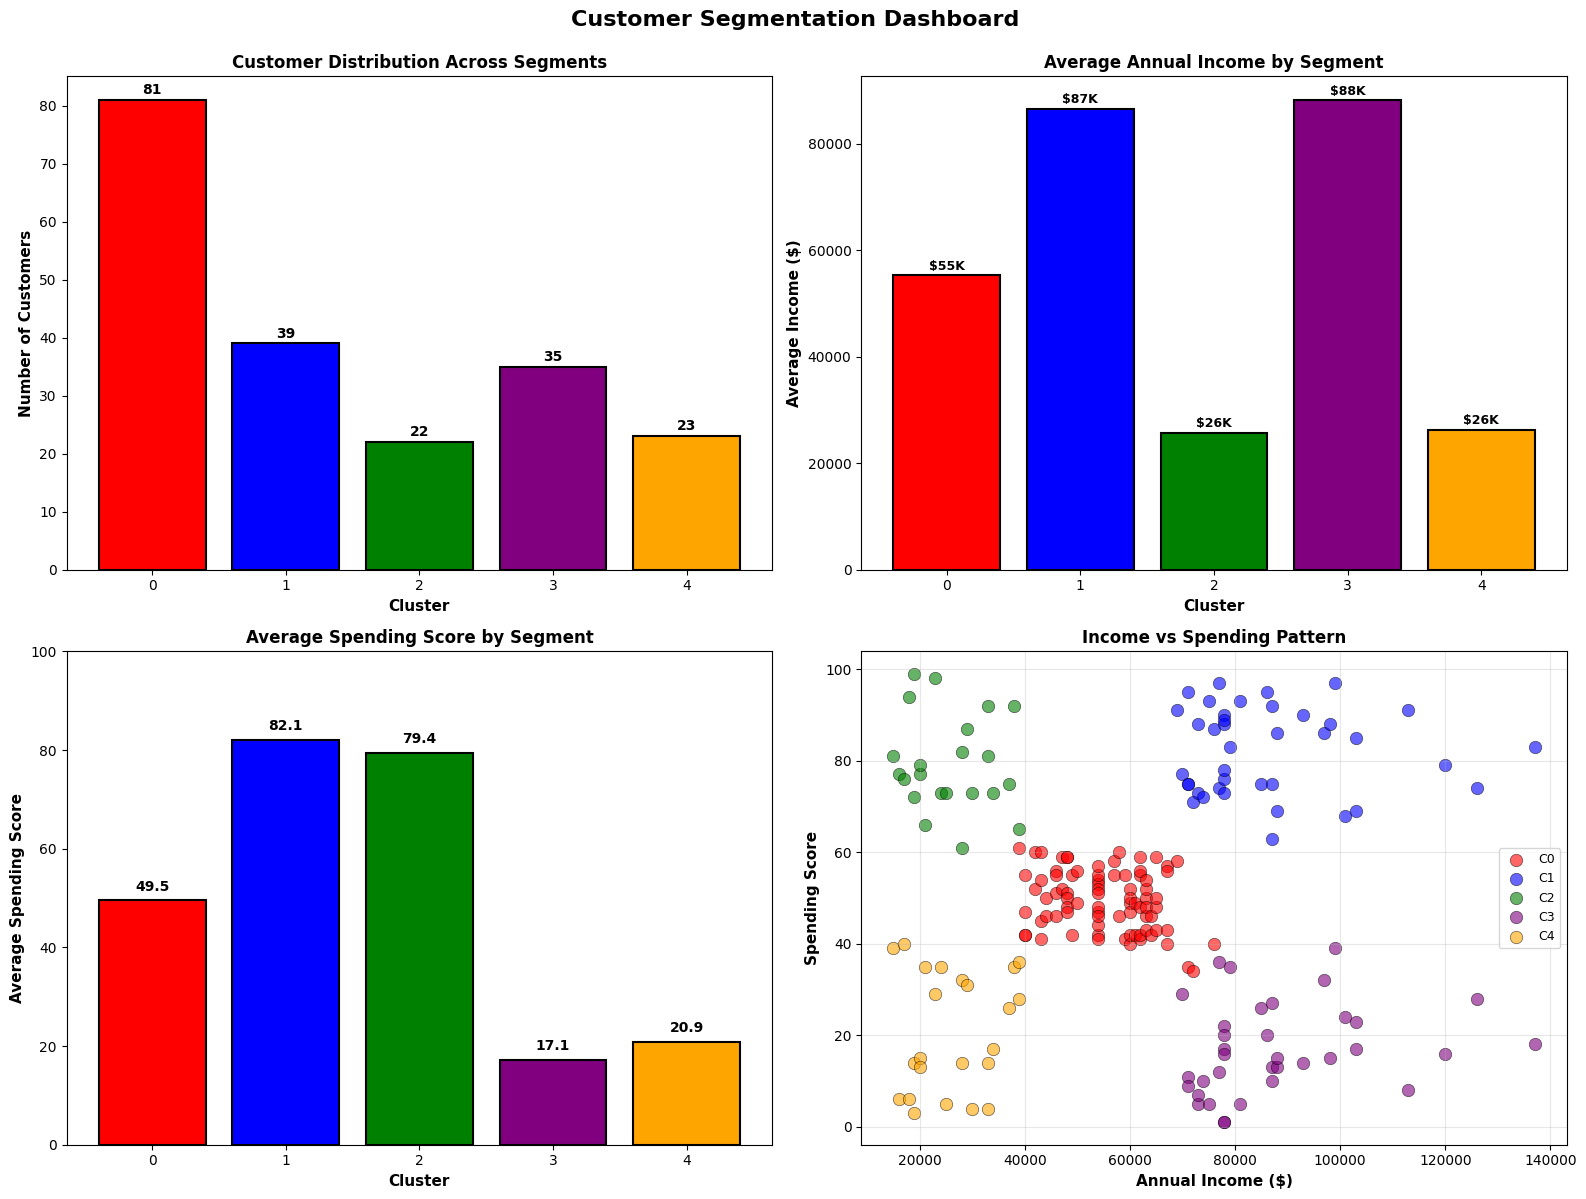

Dashboard created successfully!


In [23]:
# Create a visual dashboard summary
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Cluster Size Distribution
cluster_sizes = df['Cluster'].value_counts().sort_index()
colors_chart = ['red', 'blue', 'green', 'purple', 'orange']
axes[0, 0].bar(range(optimal_k), cluster_sizes, color=colors_chart, edgecolor='black', linewidth=1.5)
axes[0, 0].set_xlabel('Cluster', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Number of Customers', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Customer Distribution Across Segments', fontsize=12, fontweight='bold')
axes[0, 0].set_xticks(range(optimal_k))
for i, v in enumerate(cluster_sizes):
    axes[0, 0].text(i, v + 1, str(v), ha='center', fontweight='bold')

# 2. Average Income by Cluster
avg_income = df.groupby('Cluster')['Annual_Income'].mean()
axes[0, 1].bar(range(optimal_k), avg_income, color=colors_chart, edgecolor='black', linewidth=1.5)
axes[0, 1].set_xlabel('Cluster', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Average Income ($)', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Average Annual Income by Segment', fontsize=12, fontweight='bold')
axes[0, 1].set_xticks(range(optimal_k))
for i, v in enumerate(avg_income):
    axes[0, 1].text(i, v + 1000, f'${v/1000:.0f}K', ha='center', fontweight='bold', fontsize=9)

# 3. Average Spending Score by Cluster
avg_spending = df.groupby('Cluster')['Spending_Score'].mean()
axes[1, 0].bar(range(optimal_k), avg_spending, color=colors_chart, edgecolor='black', linewidth=1.5)
axes[1, 0].set_xlabel('Cluster', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Average Spending Score', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Average Spending Score by Segment', fontsize=12, fontweight='bold')
axes[1, 0].set_xticks(range(optimal_k))
axes[1, 0].set_ylim(0, 100)
for i, v in enumerate(avg_spending):
    axes[1, 0].text(i, v + 2, f'{v:.1f}', ha='center', fontweight='bold')

# 4. Income vs Spending Score by Cluster
for cluster_id in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster_id]
    axes[1, 1].scatter(cluster_data['Annual_Income'], 
                      cluster_data['Spending_Score'],
                      s=80, 
                      c=colors_chart[cluster_id], 
                      label=f'C{cluster_id}',
                      alpha=0.6,
                      edgecolors='black',
                      linewidths=0.5)
axes[1, 1].set_xlabel('Annual Income ($)', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Spending Score', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Income vs Spending Pattern', fontsize=12, fontweight='bold')
axes[1, 1].legend(fontsize=9)
axes[1, 1].grid(True, alpha=0.3)

plt.suptitle('Customer Segmentation Dashboard', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("Dashboard created successfully!")

In [24]:
# Create a comprehensive results file
print("\n" + "=" * 80)
print("EXPORTING RESULTS")
print("=" * 80)

# Save clustered data
df.to_csv('customer_segments_with_labels.csv', index=False)
print("\n1. Full dataset with cluster labels saved to: 'customer_segments_with_labels.csv'")

# Create and save cluster summary
cluster_summary_detailed = df.groupby(['Cluster', 'Cluster_Name']).agg({
    'CustomerID': 'count',
    'Age': ['mean', 'min', 'max'],
    'Annual_Income': ['mean', 'min', 'max'],
    'Spending_Score': ['mean', 'min', 'max']
}).round(2)

cluster_summary_detailed.to_csv('cluster_summary_statistics.csv')
print("2. Cluster summary statistics saved to: 'cluster_summary_statistics.csv'")

# Show sample of each cluster
print("\n" + "=" * 80)
print("SAMPLE CUSTOMERS FROM EACH SEGMENT")
print("=" * 80)

for cluster_id in range(optimal_k):
    print(f"\n{cluster_names[cluster_id]} (Cluster {cluster_id}) - Sample:")
    sample = df[df['Cluster'] == cluster_id][['CustomerID', 'Age', 'Gender', 'Annual_Income', 'Spending_Score']].head(3)
    print(sample.to_string(index=False))

print("\n" + "=" * 80)
print("PROJECT COMPLETE!")
print("=" * 80)
print("\nWhat you've learned:")
print("1. Data loading and exploration")
print("2. Data cleaning and preprocessing")
print("3. Feature scaling (StandardScaler)")
print("4. Finding optimal K using Elbow Method and Silhouette Score")
print("5. K-Means clustering algorithm")
print("6. Cluster analysis and interpretation")
print("7. Data visualization")
print("8. Business insights generation")
print("\nNext steps you could take:")
print("- Try clustering with more features (include Age, Gender)")
print("- Try other algorithms (DBSCAN, Hierarchical Clustering)")
print("- Build a prediction model to assign new customers to clusters")
print("- Create a recommendation system based on clusters")


EXPORTING RESULTS

1. Full dataset with cluster labels saved to: 'customer_segments_with_labels.csv'
2. Cluster summary statistics saved to: 'cluster_summary_statistics.csv'

SAMPLE CUSTOMERS FROM EACH SEGMENT

Middle Income, Average Spenders (Cluster 0) - Sample:
 CustomerID  Age Gender  Annual_Income  Spending_Score
         44   31 Female          39000              61
         47   50 Female          40000              55
         48   27 Female          40000              47

High Income, High Spenders (Cluster 1) - Sample:
 CustomerID  Age Gender  Annual_Income  Spending_Score
        124   39   Male          69000              91
        126   31 Female          70000              77
        128   40   Male          71000              95

Low Income, High Spenders (Cluster 2) - Sample:
 CustomerID  Age Gender  Annual_Income  Spending_Score
          2   21   Male          15000              81
          4   23 Female          16000              77
          6   22 Female       

In [25]:
# Print final comprehensive analysis
print("=" * 80)
print("EXECUTIVE SUMMARY - CUSTOMER SEGMENTATION ANALYSIS")
print("=" * 80)
print()

print("CLUSTER 0 (RED) - Middle Income, Average Spenders")
print("-" * 80)
print("Size: 81 customers (40.5% - LARGEST SEGMENT)")
print("Average Income: $55,000")
print("Average Spending Score: 49.5/100")
print()
print("KEY INSIGHTS:")
print("- This is your mainstream customer base")
print("- Moderate income with moderate spending")
print("- Largest segment, representing the 'average' shopper")
print()
print("STRATEGY:")
print("- Standard product offerings and promotions")
print("- Focus on value for money")
print("- Loyalty programs to increase frequency")
print("- Cross-selling opportunities")
print()

print("=" * 80)
print()

print("CLUSTER 1 (BLUE) - High Income, High Spenders ⭐ VIP SEGMENT")
print("-" * 80)
print("Size: 39 customers (19.5%)")
print("Average Income: $87,000 (HIGHEST)")
print("Average Spending Score: 82.1/100 (HIGHEST)")
print()
print("KEY INSIGHTS:")
print("- Your most valuable customers!")
print("- High earners who are not afraid to spend")
print("- Contribute significantly to revenue despite being only 19.5%")
print()
print("STRATEGY:")
print("- VIP/Premium tier membership")
print("- Exclusive products and early access")
print("- Personalized shopping experiences")
print("- Premium customer service")
print("- High-value product recommendations")
print()

print("=" * 80)
print()

print("CLUSTER 2 (GREEN) - Low Income, High Spenders 🎯 OPPORTUNITY")
print("-" * 80)
print("Size: 22 customers (11%)")
print("Average Income: $26,000 (LOWEST)")
print("Average Spending Score: 79.4/100 (SECOND HIGHEST)")
print()
print("KEY INSIGHTS:")
print("- Young professionals or students who prioritize lifestyle")
print("- Spend disproportionately high relative to income")
print("- May use credit or installment plans")
print("- High engagement but need financial flexibility")
print()
print("STRATEGY:")
print("- Flexible payment options (installments, buy-now-pay-later)")
print("- Credit programs")
print("- Bundle deals and value packages")
print("- Retention is critical - they're already engaged")
print("- Student/youth discounts if applicable")
print()

print("=" * 80)
print()

print("CLUSTER 3 (PURPLE) - High Income, Low Spenders ⚠️ CHALLENGE")
print("-" * 80)
print("Size: 35 customers (17.5%)")
print("Average Income: $88,000 (HIGHEST, tied with Cluster 1)")
print("Average Spending Score: 17.1/100 (LOWEST)")
print()
print("KEY INSIGHTS:")
print("- Wealthy but conservative/selective shoppers")
print("- High potential value but currently disengaged")
print("- May shop elsewhere or be price-sensitive despite high income")
print("- Could be savers, minimalists, or unimpressed by current offerings")
print()
print("STRATEGY:")
print("- Targeted campaigns emphasizing quality and value")
print("- Exclusive limited-edition items")
print("- Build trust through reviews and testimonials")
print("- Personal shopping services")
print("- Understand why they're not spending (surveys/feedback)")
print("- Premium product education")
print()

print("=" * 80)
print()

print("CLUSTER 4 (ORANGE) - Low Income, Low Spenders 💰 BUDGET")
print("-" * 80)
print("Size: 23 customers (11.5%)")
print("Average Income: $26,000 (LOWEST, tied with Cluster 2)")
print("Average Spending Score: 20.9/100")
print()
print("KEY INSIGHTS:")
print("- Budget-conscious customers with limited disposable income")
print("- Price-sensitive and careful with spending")
print("- May only purchase necessities or during sales")
print()
print("STRATEGY:")
print("- Regular discounts and clearance sales")
print("- Budget-friendly product lines")
print("- Volume deals (buy more, save more)")
print("- Basic necessities and essentials")
print("- Email campaigns for deals and promotions")
print()

print("=" * 80)
print()

print("OVERALL RECOMMENDATIONS:")
print("-" * 80)
print("1. PRIORITIZE Cluster 1 (Blue) - Your VIP segment generates maximum revenue")
print("2. NURTURE Cluster 2 (Green) - High engagement, offer flexible payments")
print("3. CONVERT Cluster 3 (Purple) - Huge untapped potential with high income")
print("4. RETAIN Cluster 0 (Red) - Your bread and butter, keep them satisfied")
print("5. ATTRACT Cluster 4 (Orange) - Budget offerings for volume sales")
print()

print("REVENUE OPPORTUNITY RANKING:")
print("1. Cluster 1: $87K income × 82.1 spending × 39 customers = MAXIMIZE")
print("2. Cluster 3: $88K income × 17.1 spending × 35 customers = CONVERT POTENTIAL")
print("3. Cluster 0: $55K income × 49.5 spending × 81 customers = MAINTAIN")
print("4. Cluster 2: $26K income × 79.4 spending × 22 customers = SUPPORT")
print("5. Cluster 4: $26K income × 20.9 spending × 23 customers = VOLUME PLAY")
print()



EXECUTIVE SUMMARY - CUSTOMER SEGMENTATION ANALYSIS

CLUSTER 0 (RED) - Middle Income, Average Spenders
--------------------------------------------------------------------------------
Size: 81 customers (40.5% - LARGEST SEGMENT)
Average Income: $55,000
Average Spending Score: 49.5/100

KEY INSIGHTS:
- This is your mainstream customer base
- Moderate income with moderate spending
- Largest segment, representing the 'average' shopper

STRATEGY:
- Standard product offerings and promotions
- Focus on value for money
- Loyalty programs to increase frequency
- Cross-selling opportunities


CLUSTER 1 (BLUE) - High Income, High Spenders ⭐ VIP SEGMENT
--------------------------------------------------------------------------------
Size: 39 customers (19.5%)
Average Income: $87,000 (HIGHEST)
Average Spending Score: 82.1/100 (HIGHEST)

KEY INSIGHTS:
- Your most valuable customers!
- High earners who are not afraid to spend
- Contribute significantly to revenue despite being only 19.5%

STRATEGY:
-

In [75]:
# Detailed analysis to understand each cluster
print("=" * 80)
print("CLUSTER PROFILING - ")
print("=" * 80)

for cluster_id in range(5):
    cluster_data = df[df['Cluster'] == cluster_id]
    
    print(f"\n{'='*80}")
    print(f"CLUSTER {cluster_id} - Current Analysis")
    print(f"{'='*80}")
    print(f"Size: {len(cluster_data)} customers ({len(cluster_data)/len(df)*100:.1f}%)")
    print(f"\nIncome Profile:")
    print(f"  Average: ${cluster_data['Annual_Income'].mean():,.0f}")
    print(f"  Range: ${cluster_data['Annual_Income'].min():,.0f} - ${cluster_data['Annual_Income'].max():,.0f}")
    
    # Categorize income level
    avg_income = cluster_data['Annual_Income'].mean()
    if avg_income < 35000:
        income_level = "LOW INCOME"
    elif avg_income < 70000:
        income_level = "MIDDLE INCOME"
    else:
        income_level = "HIGH INCOME"
    
    print(f"\nSpending Profile:")
    print(f"  Average Score: {cluster_data['Spending_Score'].mean():.1f}/100")
    print(f"  Range: {cluster_data['Spending_Score'].min()}-{cluster_data['Spending_Score'].max()}/100")
    
    # Categorize spending level
    avg_spending = cluster_data['Spending_Score'].mean()
    if avg_spending < 35:
        spending_level = "LOW SPENDING"
    elif avg_spending < 65:
        spending_level = "MODERATE SPENDING"
    else:
        spending_level = "HIGH SPENDING"
    
    print(f"\nProfile: {income_level} + {spending_level}")
    print(f"Average Age: {cluster_data['Age'].mean():.1f} years")
    
    # Gender distribution
    gender_counts = cluster_data['Gender'].value_counts()
    print(f"\nGender Mix:")
    for gender, count in gender_counts.items():
        print(f"  {gender}: {count} ({count/len(cluster_data)*100:.1f}%)")

CLUSTER PROFILING - 

CLUSTER 0 - Current Analysis
Size: 81 customers (40.5%)

Income Profile:
  Average: $55,296
  Range: $39,000 - $76,000

Spending Profile:
  Average Score: 49.5/100
  Range: 34-61/100

Profile: MIDDLE INCOME + MODERATE SPENDING
Average Age: 42.7 years

Gender Mix:
  Female: 48 (59.3%)
  Male: 33 (40.7%)

CLUSTER 1 - Current Analysis
Size: 39 customers (19.5%)

Income Profile:
  Average: $86,538
  Range: $69,000 - $137,000

Spending Profile:
  Average Score: 82.1/100
  Range: 63-97/100

Profile: HIGH INCOME + HIGH SPENDING
Average Age: 32.7 years

Gender Mix:
  Female: 21 (53.8%)
  Male: 18 (46.2%)

CLUSTER 2 - Current Analysis
Size: 22 customers (11.0%)

Income Profile:
  Average: $25,727
  Range: $15,000 - $39,000

Spending Profile:
  Average Score: 79.4/100
  Range: 61-99/100

Profile: LOW INCOME + HIGH SPENDING
Average Age: 25.3 years

Gender Mix:
  Female: 13 (59.1%)
  Male: 9 (40.9%)

CLUSTER 3 - Current Analysis
Size: 35 customers (17.5%)

Income Profile:
  A

In [30]:
# Display sample of the updated dataset
print("\n" + "=" * 80)
print("SAMPLE DATA WITH CLUSTER NAMES")
print("=" * 80)
print()

# Show first 5 customers from each cluster
for cluster_id in range(5):
    print(f"\n{final_cluster_names[cluster_id]} (Cluster {cluster_id}):")
    print("-" * 80)
    sample = df[df['Cluster'] == cluster_id][['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score', 'Cluster', 'Cluster_Name']].head(5)
    print(sample.to_string(index=False))


SAMPLE DATA WITH CLUSTER NAMES


Core Customer Base (Cluster 0):
--------------------------------------------------------------------------------
 CustomerID Gender  Age  Annual_Income  Spending_Score  Cluster       Cluster_Name
         44 Female   31          39000              61        0 Core Customer Base
         47 Female   50          40000              55        0 Core Customer Base
         48 Female   27          40000              47        0 Core Customer Base
         49 Female   29          40000              42        0 Core Customer Base
         50 Female   31          40000              42        0 Core Customer Base

High-Value Segment (Cluster 1):
--------------------------------------------------------------------------------
 CustomerID Gender  Age  Annual_Income  Spending_Score  Cluster       Cluster_Name
        124   Male   39          69000              91        1 High-Value Segment
        126 Female   31          70000              77        1 High-Value 

In [31]:
# Show complete column structure
print("\n" + "=" * 80)
print("COMPLETE DATASET STRUCTURE")
print("=" * 80)
print(f"\nTotal Customers: {len(df)}")
print(f"\nColumns in dataset:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i}. {col}")

print("\n" + "=" * 80)
print("FIRST 15 ROWS WITH ALL INFORMATION")
print("=" * 80)
print(df[['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score', 'Cluster', 'Cluster_Name']].head(15))


COMPLETE DATASET STRUCTURE

Total Customers: 200

Columns in dataset:
  1. CustomerID
  2. Gender
  3. Age
  4. Annual_Income_k
  5. Spending_Score
  6. Annual_Income
  7. Cluster
  8. Cluster_Name

FIRST 15 ROWS WITH ALL INFORMATION
    CustomerID  Gender  Age  Annual_Income  Spending_Score  Cluster  \
0            1    Male   19          15000              39        4   
1            2    Male   21          15000              81        2   
2            3  Female   20          16000               6        4   
3            4  Female   23          16000              77        2   
4            5  Female   31          17000              40        4   
5            6  Female   22          17000              76        2   
6            7  Female   35          18000               6        4   
7            8  Female   23          18000              94        2   
8            9    Male   64          19000               3        4   
9           10  Female   30          19000             

In [32]:
# Save the complete dataset with Business Intelligence naming
output_file = 'customers_with_clusters_final.csv'
df.to_csv(output_file, index=False)

print("\n" + "=" * 80)
print("DATASET SAVED SUCCESSFULLY!")
print("=" * 80)
print(f"\nFile: '{output_file}'")
print(f"Total records: {len(df)}")
print(f"Columns: {len(df.columns)}")
print()

print("Cluster Distribution:")
cluster_summary = df['Cluster_Name'].value_counts().sort_index()
for name, count in cluster_summary.items():
    print(f"  {name}: {count} customers ({count/len(df)*100:.1f}%)")

print("\n" + "=" * 80)
print("You can now:")
print("  ✓ Open this file in Excel")
print("  ✓ Filter by Cluster_Name for targeted campaigns")
print("  ✓ Analyze customer behavior by segment")
print("  ✓ Create personalized marketing strategies")
print("=" * 80)


DATASET SAVED SUCCESSFULLY!

File: 'customers_with_clusters_final.csv'
Total records: 200
Columns: 8

Cluster Distribution:
  Core Customer Base: 81 customers (40.5%)
  High-Engagement Low-Income: 22 customers (11.0%)
  High-Value Segment: 39 customers (19.5%)
  Low-Engagement High-Income: 35 customers (17.5%)
  Price-Sensitive Segment: 23 customers (11.5%)

You can now:
  ✓ Open this file in Excel
  ✓ Filter by Cluster_Name for targeted campaigns
  ✓ Analyze customer behavior by segment
  ✓ Create personalized marketing strategies


In [33]:
# Function to find any customer's segment
def lookup_customer(customer_id):
    """Look up customer details and their cluster"""
    customer = df[df['CustomerID'] == customer_id]
    
    if len(customer) == 0:
        print(f"❌ Customer ID {customer_id} not found!")
        return
    
    print(f"\n{'='*70}")
    print(f"CUSTOMER #{customer_id} PROFILE")
    print(f"{'='*70}")
    print(f"Gender: {customer['Gender'].values[0]}")
    print(f"Age: {customer['Age'].values[0]} years")
    print(f"Annual Income: ${customer['Annual_Income'].values[0]:,}")
    print(f"Spending Score: {customer['Spending_Score'].values[0]}/100")
    print(f"\n📊 Segment Information:")
    print(f"  Cluster ID: {customer['Cluster'].values[0]}")
    print(f"  Segment: {customer['Cluster_Name'].values[0]}")
    print(f"{'='*70}")

# Test the lookup function
print("\nExample lookups:")
lookup_customer(1)
lookup_customer(50)
lookup_customer(150)


Example lookups:

CUSTOMER #1 PROFILE
Gender: Male
Age: 19 years
Annual Income: $15,000
Spending Score: 39/100

📊 Segment Information:
  Cluster ID: 4
  Segment: Price-Sensitive Segment

CUSTOMER #50 PROFILE
Gender: Female
Age: 31 years
Annual Income: $40,000
Spending Score: 42/100

📊 Segment Information:
  Cluster ID: 0
  Segment: Core Customer Base

CUSTOMER #150 PROFILE
Gender: Male
Age: 34 years
Annual Income: $78,000
Spending Score: 90/100

📊 Segment Information:
  Cluster ID: 1
  Segment: High-Value Segment


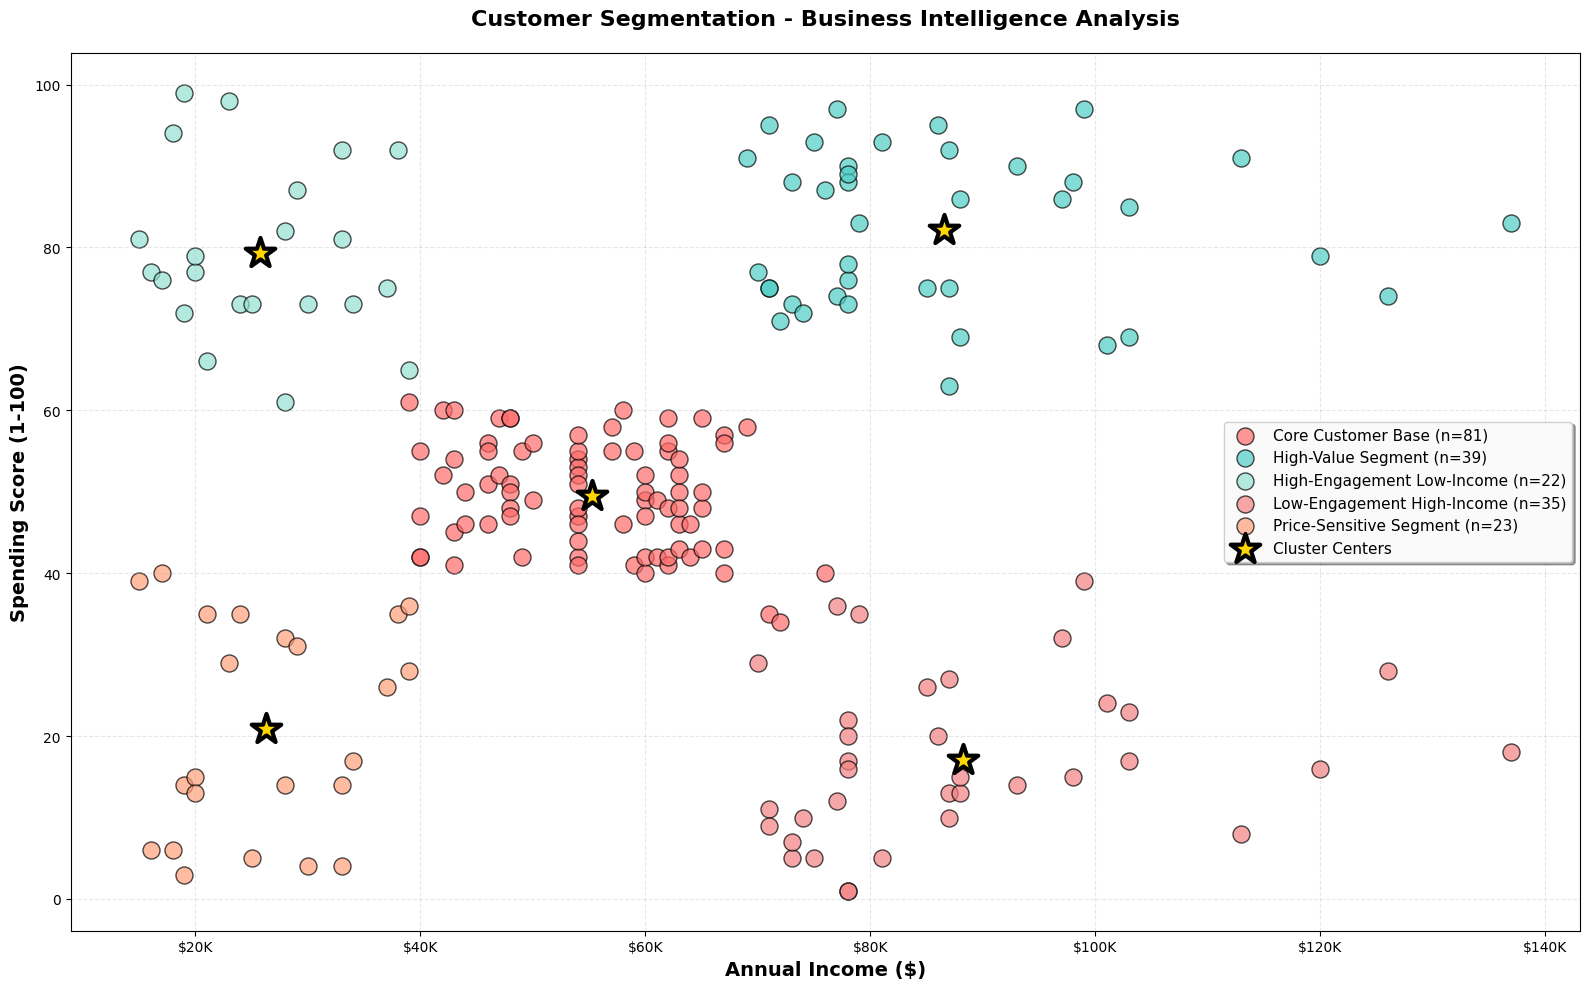

✓ Visualization 1 saved as 'customer_segments_business_intelligence.png'


In [34]:
# Create a professional scatter plot with business intelligence names
plt.figure(figsize=(16, 10))

colors = ['#FF6B6B', '#4ECDC4', '#95E1D3', '#F38181', '#FFA07A']
cluster_ids = [0, 1, 2, 3, 4]

for cluster_id in cluster_ids:
    cluster_data = df[df['Cluster'] == cluster_id]
    plt.scatter(cluster_data['Annual_Income'], 
                cluster_data['Spending_Score'],
                s=150, 
                c=colors[cluster_id], 
                label=f'{final_cluster_names[cluster_id]} (n={len(cluster_data)})',
                alpha=0.7,
                edgecolors='black',
                linewidths=1)

# Plot cluster centers
centers = scaler.inverse_transform(kmeans_final.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], 
            s=500, c='gold', marker='*', 
            edgecolors='black', linewidths=3,
            label='Cluster Centers', zorder=10)

plt.xlabel('Annual Income ($)', fontsize=14, fontweight='bold')
plt.ylabel('Spending Score (1-100)', fontsize=14, fontweight='bold')
plt.title('Customer Segmentation - Business Intelligence Analysis', 
          fontsize=16, fontweight='bold', pad=20)
plt.legend(fontsize=11, loc='best', framealpha=0.95, shadow=True)
plt.grid(True, alpha=0.3, linestyle='--')

# Format x-axis
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

plt.tight_layout()
plt.savefig('customer_segments_business_intelligence.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualization 1 saved as 'customer_segments_business_intelligence.png'")

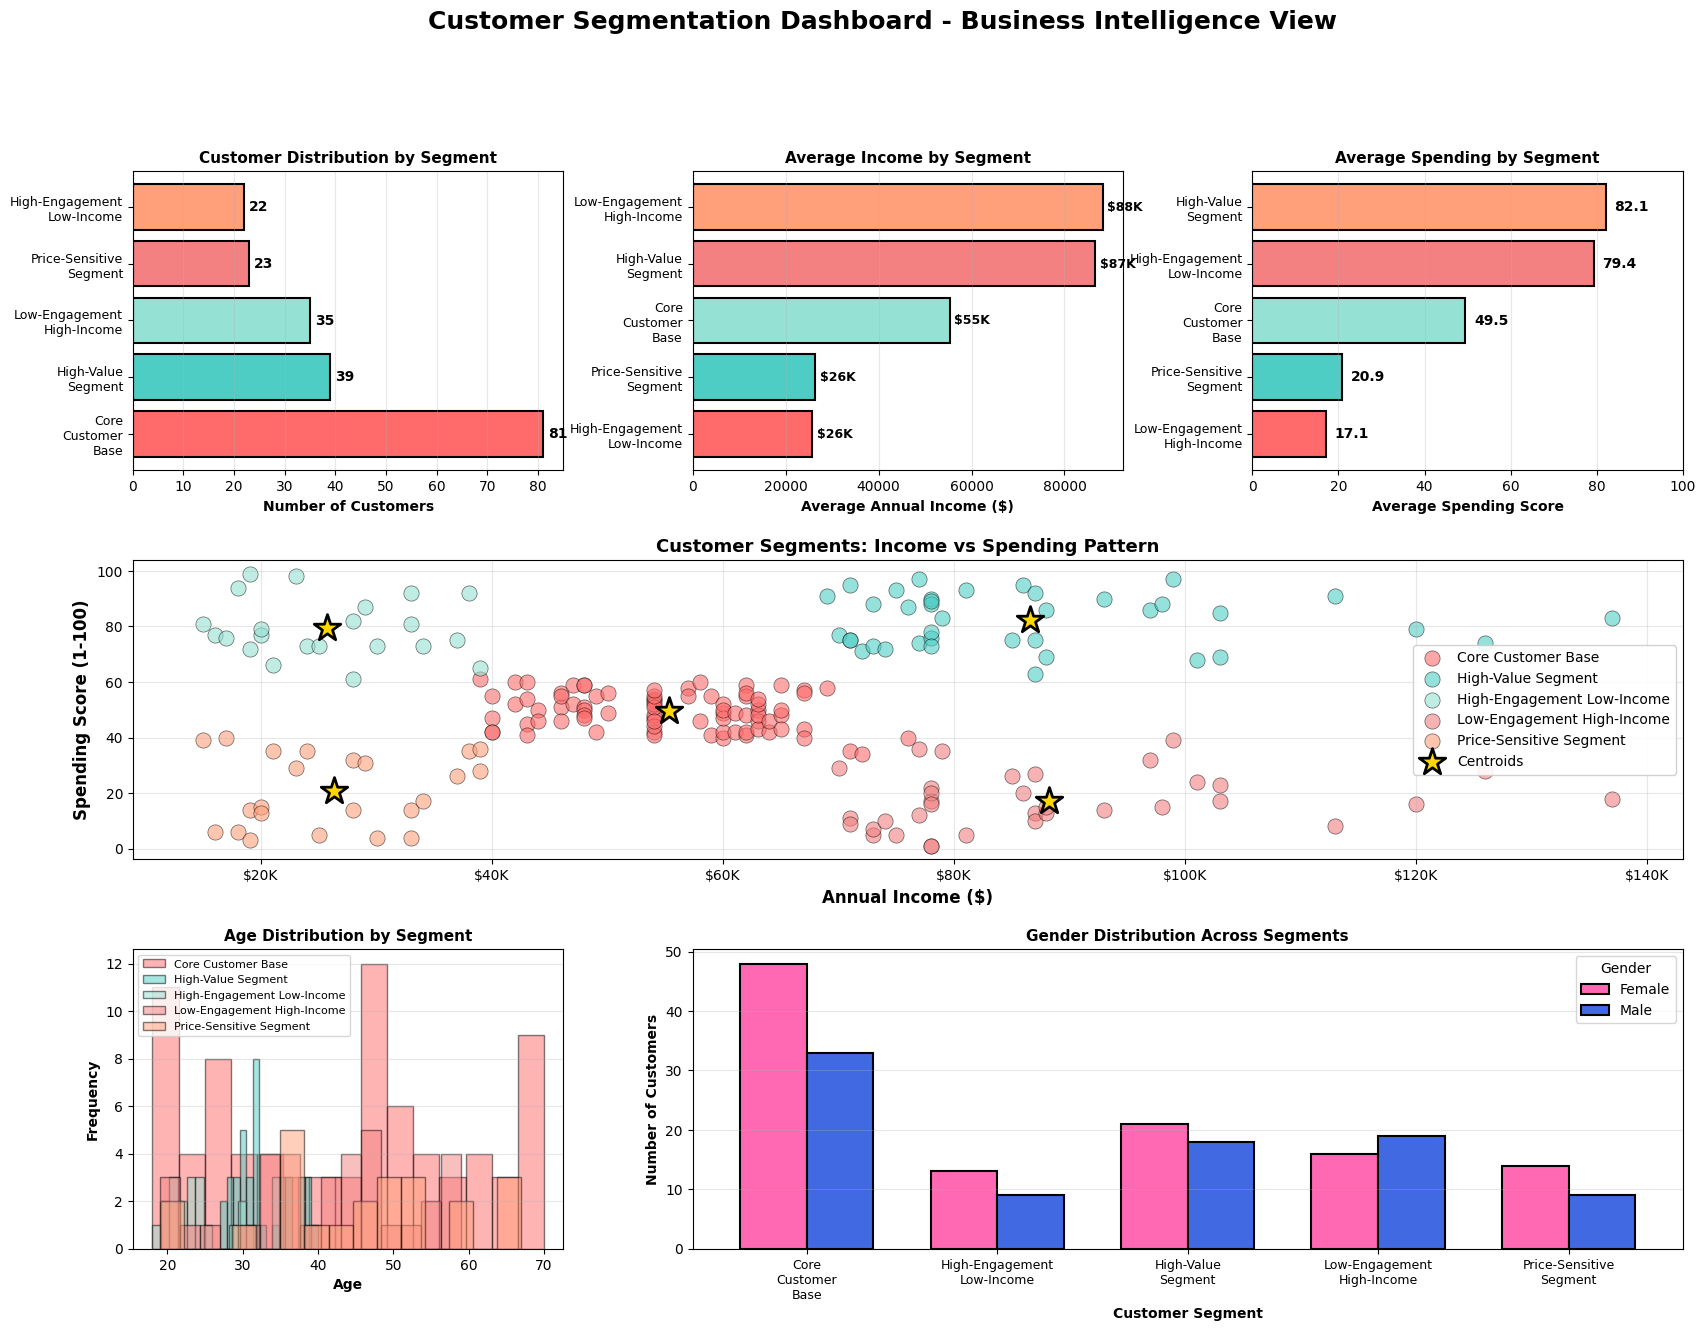

✓ Visualization 2 saved as 'customer_dashboard_complete.png'


In [35]:
# Create a 6-panel professional dashboard
fig = plt.figure(figsize=(20, 14))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# Panel 1: Cluster Size Distribution
ax1 = fig.add_subplot(gs[0, 0])
cluster_counts = df['Cluster_Name'].value_counts()
bars = ax1.barh(range(len(cluster_counts)), cluster_counts.values, color=colors, edgecolor='black', linewidth=1.5)
ax1.set_yticks(range(len(cluster_counts)))
ax1.set_yticklabels([name.replace(' ', '\n') for name in cluster_counts.index], fontsize=9)
ax1.set_xlabel('Number of Customers', fontsize=10, fontweight='bold')
ax1.set_title('Customer Distribution by Segment', fontsize=11, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)
for i, (bar, val) in enumerate(zip(bars, cluster_counts.values)):
    ax1.text(val + 1, i, str(val), va='center', fontweight='bold')

# Panel 2: Average Income by Segment
ax2 = fig.add_subplot(gs[0, 1])
avg_income = df.groupby('Cluster_Name')['Annual_Income'].mean().sort_values()
bars = ax2.barh(range(len(avg_income)), avg_income.values, color=colors, edgecolor='black', linewidth=1.5)
ax2.set_yticks(range(len(avg_income)))
ax2.set_yticklabels([name.replace(' ', '\n') for name in avg_income.index], fontsize=9)
ax2.set_xlabel('Average Annual Income ($)', fontsize=10, fontweight='bold')
ax2.set_title('Average Income by Segment', fontsize=11, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)
for i, (bar, val) in enumerate(zip(bars, avg_income.values)):
    ax2.text(val + 1000, i, f'${val/1000:.0f}K', va='center', fontweight='bold', fontsize=9)

# Panel 3: Average Spending Score by Segment
ax3 = fig.add_subplot(gs[0, 2])
avg_spending = df.groupby('Cluster_Name')['Spending_Score'].mean().sort_values()
bars = ax3.barh(range(len(avg_spending)), avg_spending.values, color=colors, edgecolor='black', linewidth=1.5)
ax3.set_yticks(range(len(avg_spending)))
ax3.set_yticklabels([name.replace(' ', '\n') for name in avg_spending.index], fontsize=9)
ax3.set_xlabel('Average Spending Score', fontsize=10, fontweight='bold')
ax3.set_title('Average Spending by Segment', fontsize=11, fontweight='bold')
ax3.set_xlim(0, 100)
ax3.grid(axis='x', alpha=0.3)
for i, (bar, val) in enumerate(zip(bars, avg_spending.values)):
    ax3.text(val + 2, i, f'{val:.1f}', va='center', fontweight='bold')

# Panel 4: Main Scatter Plot (Income vs Spending)
ax4 = fig.add_subplot(gs[1, :])
for cluster_id in cluster_ids:
    cluster_data = df[df['Cluster'] == cluster_id]
    ax4.scatter(cluster_data['Annual_Income'], 
                cluster_data['Spending_Score'],
                s=120, 
                c=colors[cluster_id], 
                label=final_cluster_names[cluster_id],
                alpha=0.6,
                edgecolors='black',
                linewidths=0.5)
centers = scaler.inverse_transform(kmeans_final.cluster_centers_)
ax4.scatter(centers[:, 0], centers[:, 1], s=400, c='gold', marker='*', 
            edgecolors='black', linewidths=2, label='Centroids', zorder=10)
ax4.set_xlabel('Annual Income ($)', fontsize=12, fontweight='bold')
ax4.set_ylabel('Spending Score (1-100)', fontsize=12, fontweight='bold')
ax4.set_title('Customer Segments: Income vs Spending Pattern', fontsize=13, fontweight='bold')
ax4.legend(fontsize=10, loc='best', framealpha=0.9)
ax4.grid(True, alpha=0.3)
ax4.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

# Panel 5: Age Distribution by Segment
ax5 = fig.add_subplot(gs[2, 0])
for cluster_id in cluster_ids:
    cluster_data = df[df['Cluster'] == cluster_id]
    ax5.hist(cluster_data['Age'], bins=15, alpha=0.5, label=final_cluster_names[cluster_id], 
             color=colors[cluster_id], edgecolor='black')
ax5.set_xlabel('Age', fontsize=10, fontweight='bold')
ax5.set_ylabel('Frequency', fontsize=10, fontweight='bold')
ax5.set_title('Age Distribution by Segment', fontsize=11, fontweight='bold')
ax5.legend(fontsize=8, loc='best')
ax5.grid(axis='y', alpha=0.3)

# Panel 6: Gender Distribution by Segment
ax6 = fig.add_subplot(gs[2, 1:])
gender_cluster = df.groupby(['Cluster_Name', 'Gender']).size().unstack(fill_value=0)
gender_cluster.plot(kind='bar', ax=ax6, color=['#FF69B4', '#4169E1'], 
                    edgecolor='black', linewidth=1.5, width=0.7)
ax6.set_xlabel('Customer Segment', fontsize=10, fontweight='bold')
ax6.set_ylabel('Number of Customers', fontsize=10, fontweight='bold')
ax6.set_title('Gender Distribution Across Segments', fontsize=11, fontweight='bold')
ax6.legend(title='Gender', fontsize=10)
ax6.set_xticklabels([name.replace(' ', '\n') for name in gender_cluster.index], 
                     rotation=0, ha='center', fontsize=9)
ax6.grid(axis='y', alpha=0.3)

plt.suptitle('Customer Segmentation Dashboard - Business Intelligence View', 
             fontsize=18, fontweight='bold', y=0.995)
plt.savefig('customer_dashboard_complete.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualization 2 saved as 'customer_dashboard_complete.png'")

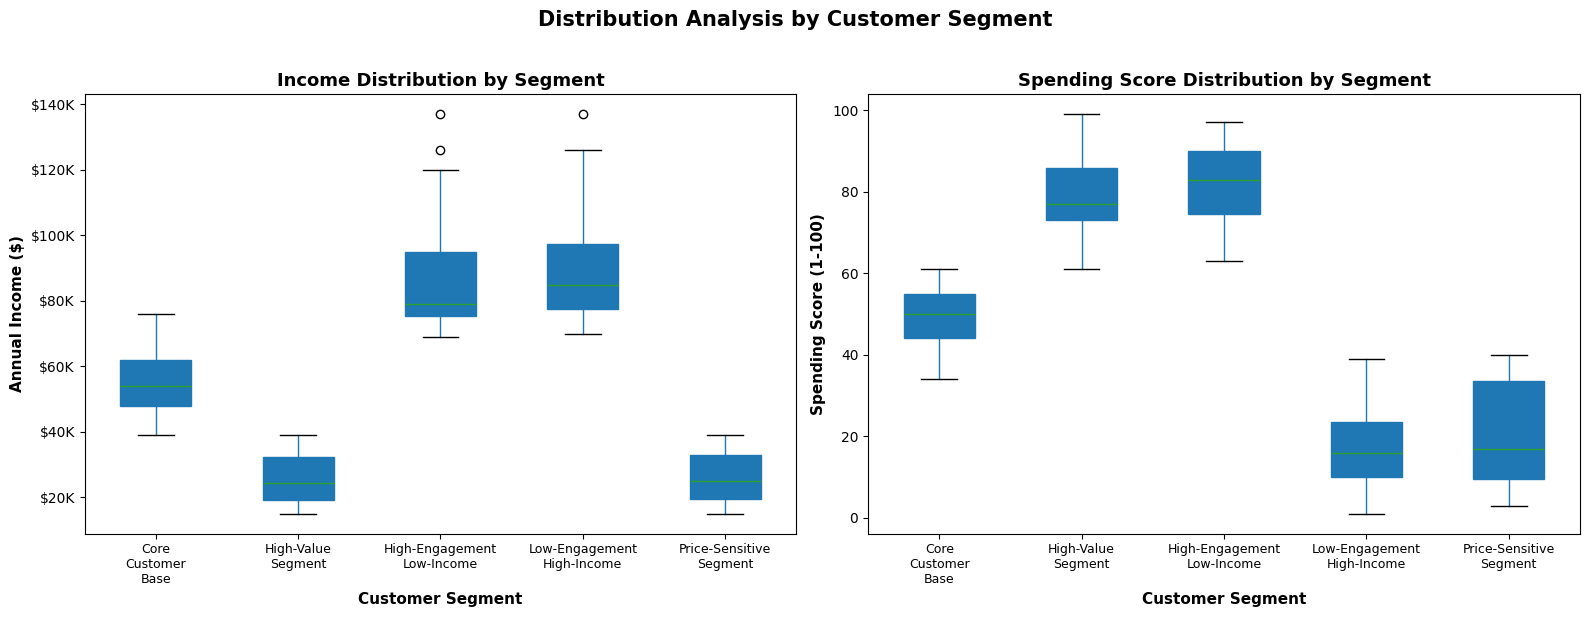

✓ Visualization 3 saved as 'segment_distributions_boxplot.png'


In [36]:
# Create box plots to show distribution within each segment
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Income distribution by segment
df.boxplot(column='Annual_Income', by='Cluster_Name', ax=axes[0], 
           patch_artist=True, grid=False)
axes[0].set_title('Income Distribution by Segment', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Customer Segment', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Annual Income ($)', fontsize=11, fontweight='bold')
axes[0].set_xticklabels([name.replace(' ', '\n') for name in final_cluster_names.values()], 
                        rotation=0, fontsize=9)
axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))
plt.sca(axes[0])
plt.xticks(rotation=0)

# Spending distribution by segment
df.boxplot(column='Spending_Score', by='Cluster_Name', ax=axes[1], 
           patch_artist=True, grid=False)
axes[1].set_title('Spending Score Distribution by Segment', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Customer Segment', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Spending Score (1-100)', fontsize=11, fontweight='bold')
axes[1].set_xticklabels([name.replace(' ', '\n') for name in final_cluster_names.values()], 
                        rotation=0, fontsize=9)
plt.sca(axes[1])
plt.xticks(rotation=0)

plt.suptitle('Distribution Analysis by Customer Segment', fontsize=15, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('segment_distributions_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualization 3 saved as 'segment_distributions_boxplot.png'")

In [37]:
print("\n" + "=" * 80)
print("EXPORTING SEGMENTS FOR MARKETING CAMPAIGNS")
print("=" * 80)
print()

# Create a marketing directory
import os
if not os.path.exists('marketing_segments'):
    os.makedirs('marketing_segments')
    print("✓ Created 'marketing_segments' folder")

# Export each segment to separate CSV files
for cluster_id in cluster_ids:
    cluster_name = final_cluster_names[cluster_id]
    cluster_data = df[df['Cluster'] == cluster_id]
    
    # Select relevant columns for marketing
    marketing_data = cluster_data[['CustomerID', 'Gender', 'Age', 
                                    'Annual_Income', 'Spending_Score', 
                                    'Cluster', 'Cluster_Name']].copy()
    
    # Create filename
    filename = f"marketing_segments/segment_{cluster_id}_{cluster_name.replace(' ', '_').replace('-', '_')}.csv"
    
    # Save to CSV
    marketing_data.to_csv(filename, index=False)
    
    print(f"✓ Exported: {cluster_name}")
    print(f"  File: {filename}")
    print(f"  Customers: {len(marketing_data)}")
    print(f"  Avg Income: ${marketing_data['Annual_Income'].mean():,.0f}")
    print(f"  Avg Spending: {marketing_data['Spending_Score'].mean():.1f}")
    print()


EXPORTING SEGMENTS FOR MARKETING CAMPAIGNS

✓ Exported: Core Customer Base
  File: marketing_segments/segment_0_Core_Customer_Base.csv
  Customers: 81
  Avg Income: $55,296
  Avg Spending: 49.5

✓ Exported: High-Value Segment
  File: marketing_segments/segment_1_High_Value_Segment.csv
  Customers: 39
  Avg Income: $86,538
  Avg Spending: 82.1

✓ Exported: High-Engagement Low-Income
  File: marketing_segments/segment_2_High_Engagement_Low_Income.csv
  Customers: 22
  Avg Income: $25,727
  Avg Spending: 79.4

✓ Exported: Low-Engagement High-Income
  File: marketing_segments/segment_3_Low_Engagement_High_Income.csv
  Customers: 35
  Avg Income: $88,200
  Avg Spending: 17.1

✓ Exported: Price-Sensitive Segment
  File: marketing_segments/segment_4_Price_Sensitive_Segment.csv
  Customers: 23
  Avg Income: $26,304
  Avg Spending: 20.9



In [38]:
# Create a detailed marketing summary for each segment
marketing_summary = []

for cluster_id in cluster_ids:
    cluster_name = final_cluster_names[cluster_id]
    cluster_data = df[df['Cluster'] == cluster_id]
    
    summary = {
        'Segment_Name': cluster_name,
        'Cluster_ID': cluster_id,
        'Customer_Count': len(cluster_data),
        'Percentage_of_Total': f"{len(cluster_data)/len(df)*100:.1f}%",
        'Avg_Age': f"{cluster_data['Age'].mean():.1f}",
        'Age_Range': f"{cluster_data['Age'].min()}-{cluster_data['Age'].max()}",
        'Avg_Income': f"${cluster_data['Annual_Income'].mean():,.0f}",
        'Income_Range': f"${cluster_data['Annual_Income'].min():,}-${cluster_data['Annual_Income'].max():,}",
        'Avg_Spending_Score': f"{cluster_data['Spending_Score'].mean():.1f}",
        'Spending_Range': f"{cluster_data['Spending_Score'].min()}-{cluster_data['Spending_Score'].max()}",
        'Female_Count': len(cluster_data[cluster_data['Gender'] == 'Female']),
        'Male_Count': len(cluster_data[cluster_data['Gender'] == 'Male']),
        'Female_Percentage': f"{len(cluster_data[cluster_data['Gender'] == 'Female'])/len(cluster_data)*100:.1f}%"
    }
    
    marketing_summary.append(summary)

# Convert to DataFrame
marketing_summary_df = pd.DataFrame(marketing_summary)

# Save marketing summary
marketing_summary_df.to_csv('marketing_segments/MARKETING_SUMMARY_ALL_SEGMENTS.csv', index=False)

print("=" * 80)
print("MARKETING SUMMARY REPORT")
print("=" * 80)
print(marketing_summary_df.to_string(index=False))
print()
print("✓ Marketing summary saved as 'marketing_segments/MARKETING_SUMMARY_ALL_SEGMENTS.csv'")

MARKETING SUMMARY REPORT
              Segment_Name  Cluster_ID  Customer_Count Percentage_of_Total Avg_Age Age_Range Avg_Income     Income_Range Avg_Spending_Score Spending_Range  Female_Count  Male_Count Female_Percentage
        Core Customer Base           0              81               40.5%    42.7     18-70    $55,296  $39,000-$76,000               49.5          34-61            48          33             59.3%
        High-Value Segment           1              39               19.5%    32.7     27-40    $86,538 $69,000-$137,000               82.1          63-97            21          18             53.8%
High-Engagement Low-Income           2              22               11.0%    25.3     18-35    $25,727  $15,000-$39,000               79.4          61-99            13           9             59.1%
Low-Engagement High-Income           3              35               17.5%    41.1     19-59    $88,200 $70,000-$137,000               17.1           1-39            16          1

In [41]:
print("\n" + "=" * 80)
print("HIERARCHICAL CLUSTERING - Alternative Approach")
print("=" * 80)
print()

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

print("Performing Hierarchical Clustering...")
print("This uses a different approach - builds a tree of clusters")
print()


HIERARCHICAL CLUSTERING - Alternative Approach

Performing Hierarchical Clustering...
This uses a different approach - builds a tree of clusters



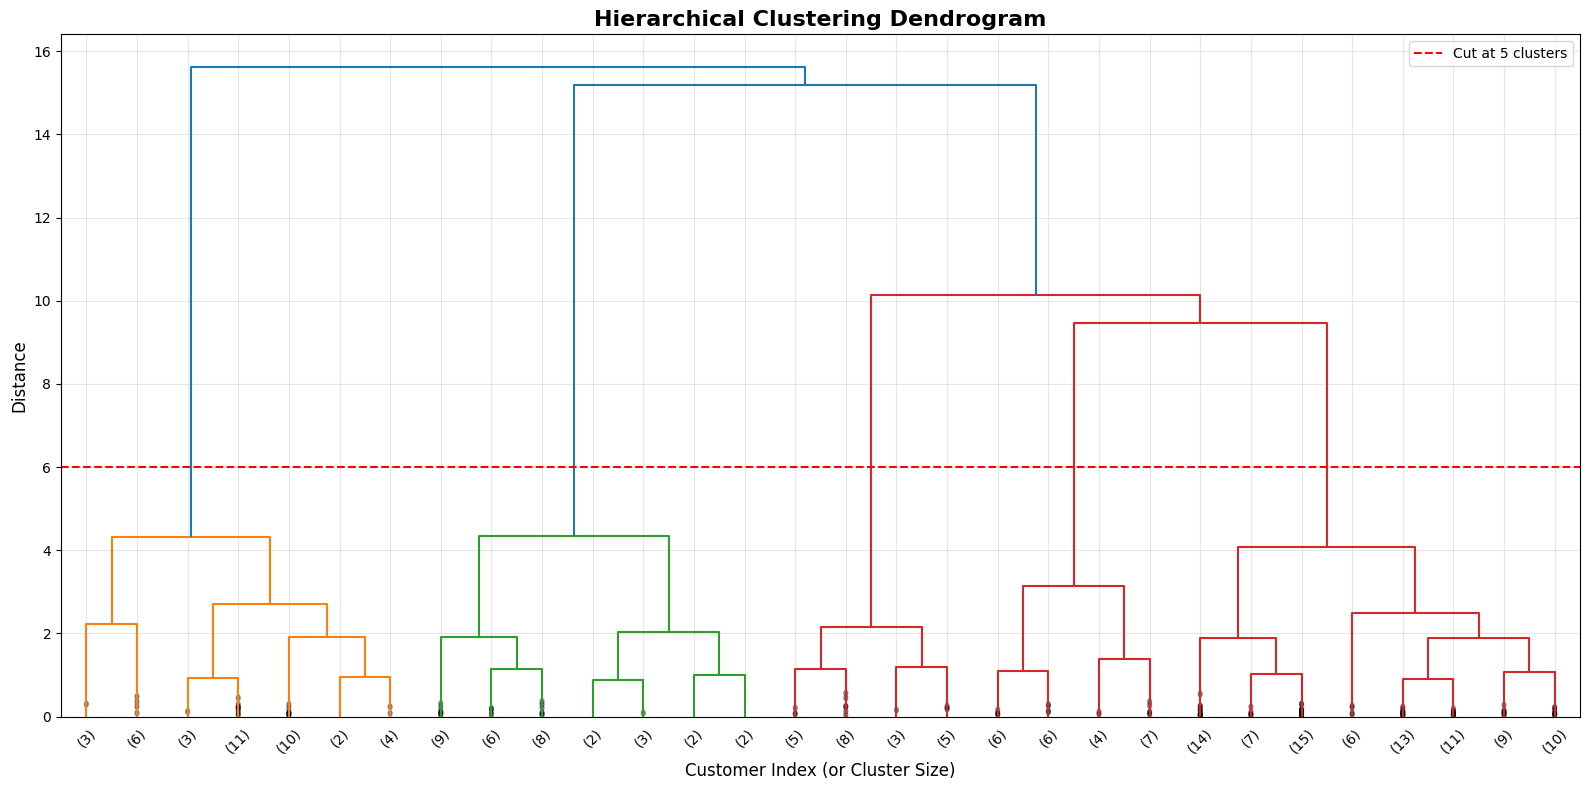

✓ Dendrogram saved as 'hierarchical_dendrogram.png'

The dendrogram shows how customers are grouped hierarchically
The height of each branch indicates how different clusters are


In [42]:
# Create linkage matrix for dendrogram
linkage_matrix = linkage(X_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(16, 8))
dendrogram(linkage_matrix, 
           truncate_mode='lastp',
           p=30,
           leaf_font_size=10,
           show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram', fontsize=16, fontweight='bold')
plt.xlabel('Customer Index (or Cluster Size)', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.axhline(y=6, color='r', linestyle='--', label='Cut at 5 clusters')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('hierarchical_dendrogram.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Dendrogram saved as 'hierarchical_dendrogram.png'")
print("\nThe dendrogram shows how customers are grouped hierarchically")
print("The height of each branch indicates how different clusters are")

In [43]:
# Apply Agglomerative (Hierarchical) Clustering with 5 clusters
hierarchical = AgglomerativeClustering(n_clusters=5, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(X_scaled)

# Add to dataframe
df['Hierarchical_Cluster'] = hierarchical_labels

print("\n" + "=" * 80)
print("HIERARCHICAL CLUSTERING RESULTS")
print("=" * 80)
print()

# Compare cluster sizes
print("Cluster distribution:")
for i in range(5):
    count = len(df[df['Hierarchical_Cluster'] == i])
    print(f"Cluster {i}: {count} customers ({count/len(df)*100:.1f}%)")


HIERARCHICAL CLUSTERING RESULTS

Cluster distribution:
Cluster 0: 32 customers (16.0%)
Cluster 1: 39 customers (19.5%)
Cluster 2: 85 customers (42.5%)
Cluster 3: 21 customers (10.5%)
Cluster 4: 23 customers (11.5%)


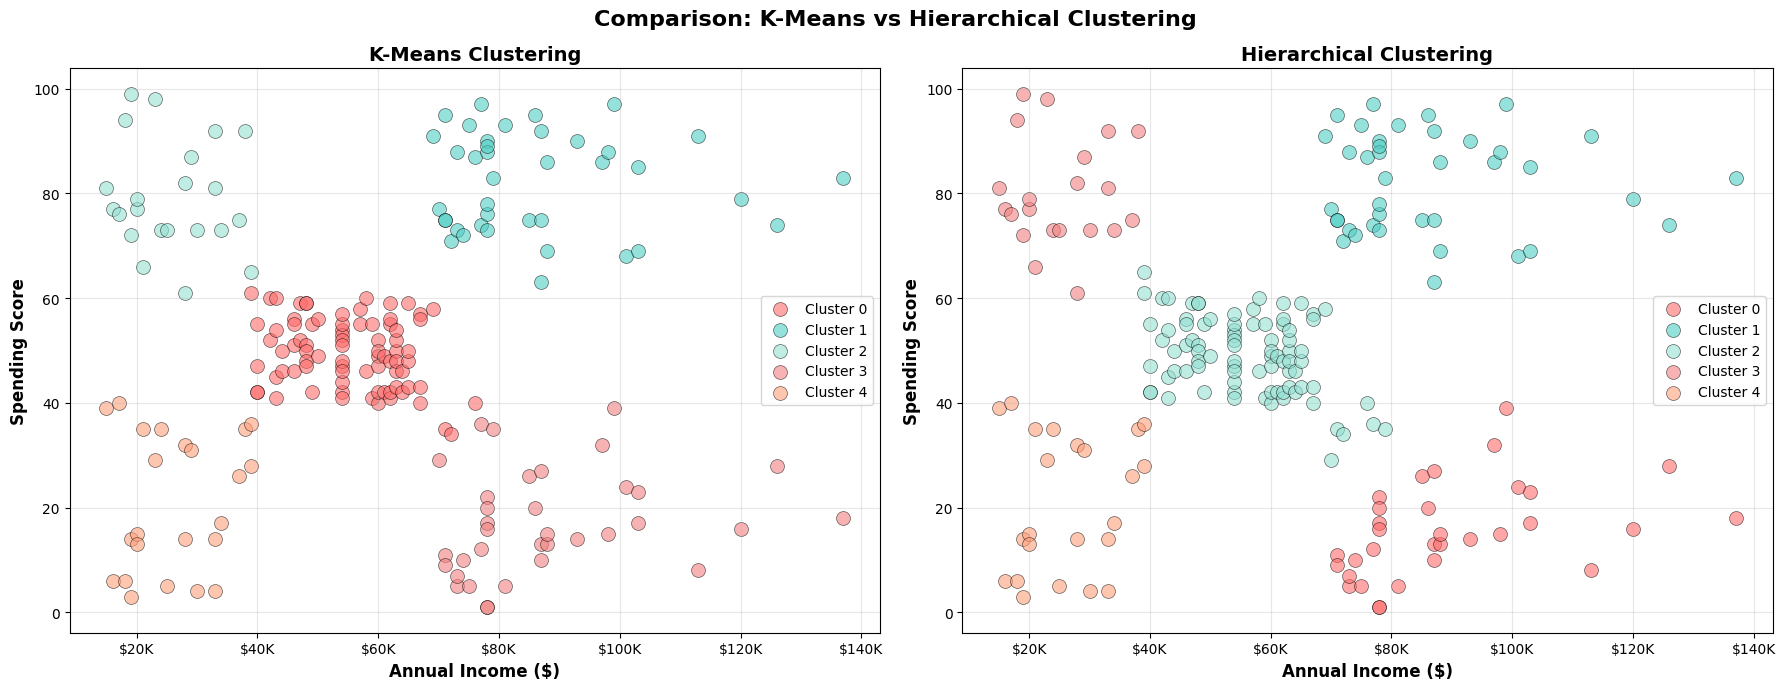

✓ Comparison saved as 'kmeans_vs_hierarchical_comparison.png'


In [44]:
# Visualize both methods side by side
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# K-Means results
for cluster_id in range(5):
    cluster_data = df[df['Cluster'] == cluster_id]
    axes[0].scatter(cluster_data['Annual_Income'], 
                   cluster_data['Spending_Score'],
                   s=100, 
                   c=colors[cluster_id], 
                   alpha=0.6,
                   edgecolors='black',
                   linewidths=0.5,
                   label=f'Cluster {cluster_id}')
axes[0].set_xlabel('Annual Income ($)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Spending Score', fontsize=12, fontweight='bold')
axes[0].set_title('K-Means Clustering', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)
axes[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

# Hierarchical results
colors_hier = ['#FF6B6B', '#4ECDC4', '#95E1D3', '#F38181', '#FFA07A']
for cluster_id in range(5):
    cluster_data = df[df['Hierarchical_Cluster'] == cluster_id]
    axes[1].scatter(cluster_data['Annual_Income'], 
                   cluster_data['Spending_Score'],
                   s=100, 
                   c=colors_hier[cluster_id], 
                   alpha=0.6,
                   edgecolors='black',
                   linewidths=0.5,
                   label=f'Cluster {cluster_id}')
axes[1].set_xlabel('Annual Income ($)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Spending Score', fontsize=12, fontweight='bold')
axes[1].set_title('Hierarchical Clustering', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)
axes[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

plt.suptitle('Comparison: K-Means vs Hierarchical Clustering', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('kmeans_vs_hierarchical_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Comparison saved as 'kmeans_vs_hierarchical_comparison.png'")

In [45]:
# Check how similar the clustering results are
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

ari = adjusted_rand_score(df['Cluster'], df['Hierarchical_Cluster'])
nmi = normalized_mutual_info_score(df['Cluster'], df['Hierarchical_Cluster'])

print("\n" + "=" * 80)
print("CLUSTERING METHOD COMPARISON")
print("=" * 80)
print(f"\nAdjusted Rand Index: {ari:.3f}")
print(f"Normalized Mutual Information: {nmi:.3f}")
print()
print("Interpretation:")
print(f"  - ARI ranges from -1 to 1 (1 = perfect agreement)")
print(f"  - NMI ranges from 0 to 1 (1 = perfect agreement)")
print()
if ari > 0.7:
    print("✓ Both methods found very similar clusters!")
elif ari > 0.5:
    print("✓ Both methods found mostly similar clusters with some differences")
else:
    print("⚠ The methods found quite different cluster structures")

# Create confusion matrix
confusion = pd.crosstab(df['Cluster'], df['Hierarchical_Cluster'], 
                        rownames=['K-Means'], colnames=['Hierarchical'])
print("\n" + "=" * 80)
print("CLUSTER OVERLAP (K-Means vs Hierarchical)")
print("=" * 80)
print(confusion)


CLUSTERING METHOD COMPARISON

Adjusted Rand Index: 0.942
Normalized Mutual Information: 0.944

Interpretation:
  - ARI ranges from -1 to 1 (1 = perfect agreement)
  - NMI ranges from 0 to 1 (1 = perfect agreement)

✓ Both methods found very similar clusters!

CLUSTER OVERLAP (K-Means vs Hierarchical)
Hierarchical   0   1   2   3   4
K-Means                         
0              0   0  81   0   0
1              0  39   0   0   0
2              0   0   1  21   0
3             32   0   3   0   0
4              0   0   0   0  23


In [46]:
print("\n" + "=" * 80)
print("PROJECT COMPLETE - SUMMARY OF ALL OUTPUTS")
print("=" * 80)
print()

print("📊 VISUALIZATIONS CREATED:")
print("  1. customer_segments_business_intelligence.png - Main scatter plot")
print("  2. customer_dashboard_complete.png - 6-panel comprehensive dashboard")
print("  3. segment_distributions_boxplot.png - Distribution analysis")
print("  4. hierarchical_dendrogram.png - Hierarchical clustering tree")
print("  5. kmeans_vs_hierarchical_comparison.png - Method comparison")
print()

print("📁 MARKETING EXPORTS (in 'marketing_segments/' folder):")
print("  1. 5 individual segment CSV files")
print("  2. MARKETING_SUMMARY_ALL_SEGMENTS.csv - Summary report")
print("  3. CAMPAIGN_RECOMMENDATIONS.txt - Marketing strategies")
print("  4. 5 email list files (one per segment)")
print()

print("📈 ALGORITHMS EXPLORED:")
print("  1. K-Means Clustering - Primary method")
print("  2. Hierarchical Clustering - Comparison method")
print()

print("=" * 80)
print("CONGRATULATIONS! 🎉")
print("You've completed a comprehensive unsupervised learning project!")
print("=" * 80)


PROJECT COMPLETE - SUMMARY OF ALL OUTPUTS

📊 VISUALIZATIONS CREATED:
  1. customer_segments_business_intelligence.png - Main scatter plot
  2. customer_dashboard_complete.png - 6-panel comprehensive dashboard
  3. segment_distributions_boxplot.png - Distribution analysis
  4. hierarchical_dendrogram.png - Hierarchical clustering tree
  5. kmeans_vs_hierarchical_comparison.png - Method comparison

📁 MARKETING EXPORTS (in 'marketing_segments/' folder):
  1. 5 individual segment CSV files
  2. MARKETING_SUMMARY_ALL_SEGMENTS.csv - Summary report
  3. CAMPAIGN_RECOMMENDATIONS.txt - Marketing strategies
  4. 5 email list files (one per segment)

📈 ALGORITHMS EXPLORED:
  1. K-Means Clustering - Primary method
  2. Hierarchical Clustering - Comparison method

CONGRATULATIONS! 🎉
You've completed a comprehensive unsupervised learning project!


In [47]:
print("=" * 80)
print("DBSCAN - DENSITY-BASED CLUSTERING")
print("=" * 80)
print()
print("How DBSCAN differs from K-Means:")
print("-" * 80)
print()
print("K-Means:")
print("  ✓ You must specify number of clusters (K)")
print("  ✓ Assumes clusters are spherical/circular")
print("  ✓ Every point must belong to a cluster")
print("  ✓ Sensitive to outliers")
print()
print("DBSCAN:")
print("  ✓ Automatically finds the number of clusters")
print("  ✓ Can find clusters of any shape")
print("  ✓ Can identify outliers/noise points")
print("  ✓ Based on density (points close together = cluster)")
print()
print("Key Parameters:")
print("  - eps (epsilon): Maximum distance between two points to be neighbors")
print("  - min_samples: Minimum points needed to form a dense region (cluster)")
print()

DBSCAN - DENSITY-BASED CLUSTERING

How DBSCAN differs from K-Means:
--------------------------------------------------------------------------------

K-Means:
  ✓ You must specify number of clusters (K)
  ✓ Assumes clusters are spherical/circular
  ✓ Every point must belong to a cluster
  ✓ Sensitive to outliers

DBSCAN:
  ✓ Automatically finds the number of clusters
  ✓ Can find clusters of any shape
  ✓ Can identify outliers/noise points
  ✓ Based on density (points close together = cluster)

Key Parameters:
  - eps (epsilon): Maximum distance between two points to be neighbors
  - min_samples: Minimum points needed to form a dense region (cluster)



In [48]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np

print("✓ DBSCAN imported successfully!")

✓ DBSCAN imported successfully!



FINDING OPTIMAL EPS PARAMETER



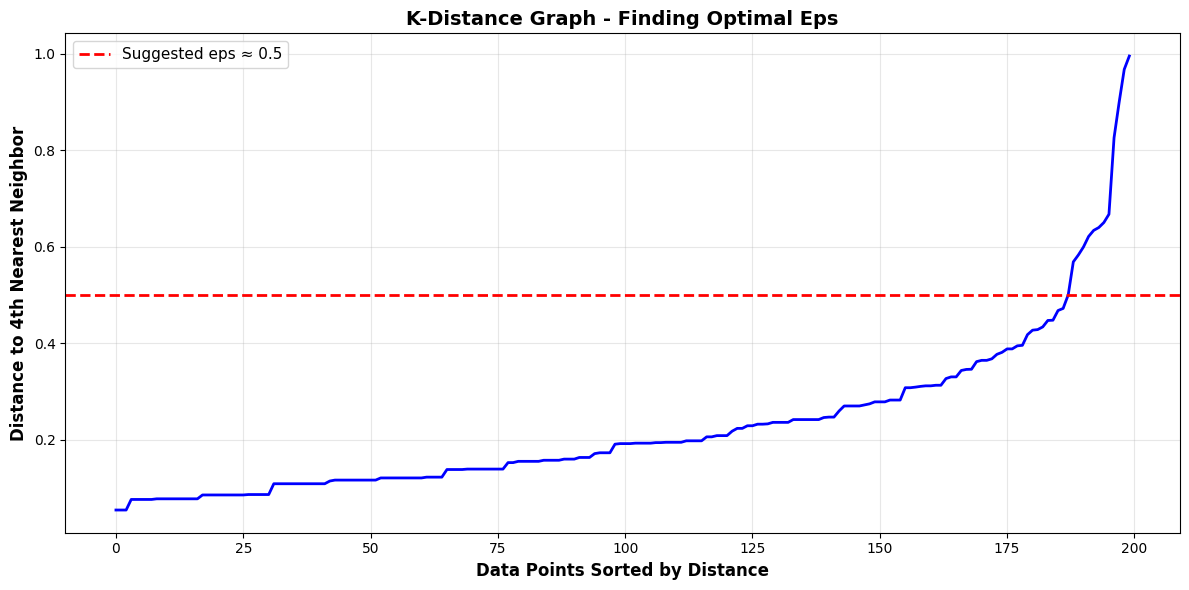

✓ K-distance graph created!

How to read this graph:
  - Look for the 'elbow' point where the curve bends sharply
  - The y-value at the elbow is your optimal eps
  - Sharp increase = noise points (outliers)

Suggested eps value: Look where the curve starts to rise steeply


In [49]:
print("\n" + "=" * 80)
print("FINDING OPTIMAL EPS PARAMETER")
print("=" * 80)
print()

# Calculate distances to k-nearest neighbors
# Rule of thumb: k = 2 * dimensions - 1 (we have 2 dimensions, so k=3 or 4)
k = 4
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Sort distances
distances = np.sort(distances[:, k-1], axis=0)

# Plot K-distance graph
plt.figure(figsize=(12, 6))
plt.plot(distances, linewidth=2, color='blue')
plt.xlabel('Data Points Sorted by Distance', fontsize=12, fontweight='bold')
plt.ylabel(f'Distance to {k}th Nearest Neighbor', fontsize=12, fontweight='bold')
plt.title('K-Distance Graph - Finding Optimal Eps', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add annotation
plt.axhline(y=0.5, color='red', linestyle='--', linewidth=2, label='Suggested eps ≈ 0.5')
plt.legend(fontsize=11)

plt.tight_layout()
plt.savefig('dbscan_k_distance_graph.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ K-distance graph created!")
print()
print("How to read this graph:")
print("  - Look for the 'elbow' point where the curve bends sharply")
print("  - The y-value at the elbow is your optimal eps")
print("  - Sharp increase = noise points (outliers)")
print()
print("Suggested eps value: Look where the curve starts to rise steeply")

In [50]:
print("\n" + "=" * 80)
print("TESTING DIFFERENT EPS VALUES")
print("=" * 80)
print()

# Test various eps values
eps_values = [0.3, 0.4, 0.5, 0.6, 0.7]
min_samples = 4  # Common choice: 2 * dimensions

results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X_scaled)
    
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    
    results.append({
        'eps': eps,
        'n_clusters': n_clusters,
        'n_noise': n_noise,
        'n_clustered': len(labels) - n_noise
    })
    
    print(f"eps={eps}, min_samples={min_samples}:")
    print(f"  Clusters found: {n_clusters}")
    print(f"  Noise points: {n_noise} ({n_noise/len(labels)*100:.1f}%)")
    print(f"  Clustered points: {len(labels) - n_noise} ({(len(labels)-n_noise)/len(labels)*100:.1f}%)")
    print()

# Create results dataframe
results_df = pd.DataFrame(results)
print("\nSummary Table:")
print(results_df.to_string(index=False))


TESTING DIFFERENT EPS VALUES

eps=0.3, min_samples=4:
  Clusters found: 8
  Noise points: 23 (11.5%)
  Clustered points: 177 (88.5%)

eps=0.4, min_samples=4:
  Clusters found: 3
  Noise points: 14 (7.0%)
  Clustered points: 186 (93.0%)

eps=0.5, min_samples=4:
  Clusters found: 2
  Noise points: 8 (4.0%)
  Clustered points: 192 (96.0%)

eps=0.6, min_samples=4:
  Clusters found: 1
  Noise points: 5 (2.5%)
  Clustered points: 195 (97.5%)

eps=0.7, min_samples=4:
  Clusters found: 1
  Noise points: 0 (0.0%)
  Clustered points: 200 (100.0%)


Summary Table:
 eps  n_clusters  n_noise  n_clustered
 0.3           8       23          177
 0.4           3       14          186
 0.5           2        8          192
 0.6           1        5          195
 0.7           1        0          200


C:\Users\Admin\AppData\Local\Temp\ipykernel_11844\2141636703.py:31: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axes[idx].scatter(X_scaled[mask, 0], X_scaled[mask, 1],
C:\Users\Admin\AppData\Local\Temp\ipykernel_11844\2141636703.py:31: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axes[idx].scatter(X_scaled[mask, 0], X_scaled[mask, 1],
C:\Users\Admin\AppData\Local\Temp\ipykernel_11844\2141636703.py:31: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axes[idx].scatter(X_scaled[mask, 0], X_scaled[mask, 1],
C:\Users\Admin\AppData\Local\Temp\ipykernel

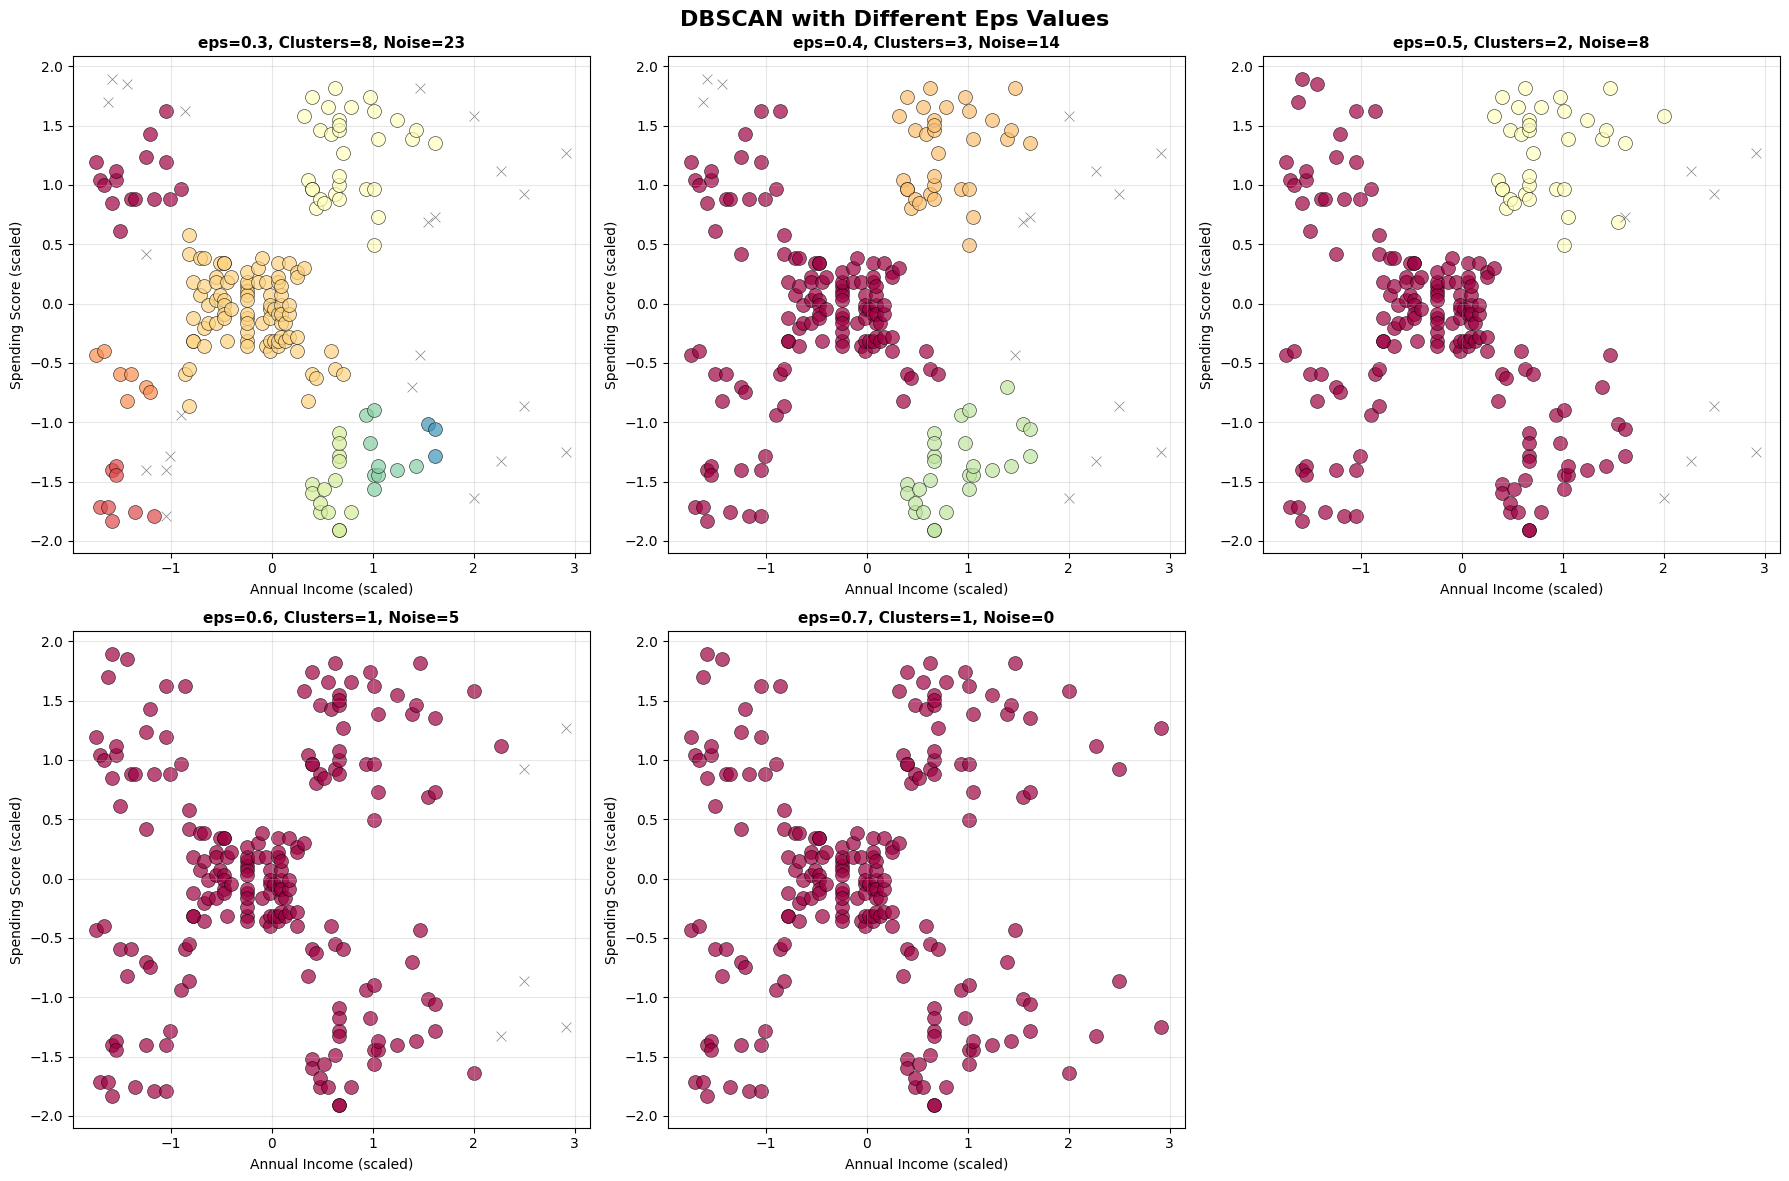


✓ Visualization saved as 'dbscan_eps_comparison.png'


In [51]:
# Visualize results for different eps values
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, eps in enumerate(eps_values):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X_scaled)
    
    # Get unique labels
    unique_labels = set(labels)
    n_clusters = len(unique_labels) - (1 if -1 in labels else 0)
    
    # Create color map
    colors_db = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    
    for label, color in zip(unique_labels, colors_db):
        if label == -1:
            # Noise points in black
            color = 'black'
            marker = 'x'
            size = 50
            alpha = 0.5
            label_name = 'Noise'
        else:
            marker = 'o'
            size = 100
            alpha = 0.7
            label_name = f'Cluster {label}'
        
        mask = labels == label
        axes[idx].scatter(X_scaled[mask, 0], X_scaled[mask, 1],
                         c=[color], marker=marker, s=size, alpha=alpha,
                         edgecolors='black', linewidths=0.5)
    
    axes[idx].set_title(f'eps={eps}, Clusters={n_clusters}, Noise={list(labels).count(-1)}',
                       fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Annual Income (scaled)', fontsize=10)
    axes[idx].set_ylabel('Spending Score (scaled)', fontsize=10)
    axes[idx].grid(True, alpha=0.3)

# Hide the last subplot if not used
if len(eps_values) < 6:
    axes[-1].axis('off')

plt.suptitle('DBSCAN with Different Eps Values', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('dbscan_eps_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Visualization saved as 'dbscan_eps_comparison.png'")

In [52]:
print("\n" + "=" * 80)
print("APPLYING DBSCAN WITH OPTIMAL PARAMETERS")
print("=" * 80)
print()

# Based on testing, let's choose eps=0.5 (adjust based on your results)
optimal_eps = 0.5
optimal_min_samples = 4

print(f"Chosen parameters:")
print(f"  eps = {optimal_eps}")
print(f"  min_samples = {optimal_min_samples}")
print()

# Apply DBSCAN
dbscan_final = DBSCAN(eps=optimal_eps, min_samples=optimal_min_samples)
dbscan_labels = dbscan_final.fit_predict(X_scaled)

# Add to dataframe
df['DBSCAN_Cluster'] = dbscan_labels

# Analysis
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise_dbscan = list(dbscan_labels).count(-1)

print(f"Results:")
print(f"  Total clusters found: {n_clusters_dbscan}")
print(f"  Noise points (outliers): {n_noise_dbscan} ({n_noise_dbscan/len(df)*100:.1f}%)")
print(f"  Clustered points: {len(df) - n_noise_dbscan} ({(len(df)-n_noise_dbscan)/len(df)*100:.1f}%)")
print()

# Cluster distribution
print("Cluster distribution:")
for label in sorted(set(dbscan_labels)):
    count = list(dbscan_labels).count(label)
    if label == -1:
        print(f"  Noise (outliers): {count} customers ({count/len(df)*100:.1f}%)")
    else:
        print(f"  Cluster {label}: {count} customers ({count/len(df)*100:.1f}%)")


APPLYING DBSCAN WITH OPTIMAL PARAMETERS

Chosen parameters:
  eps = 0.5
  min_samples = 4

Results:
  Total clusters found: 2
  Noise points (outliers): 8 (4.0%)
  Clustered points: 192 (96.0%)

Cluster distribution:
  Noise (outliers): 8 customers (4.0%)
  Cluster 0: 157 customers (78.5%)
  Cluster 1: 35 customers (17.5%)


In [53]:
print("\n" + "=" * 80)
print("DBSCAN CLUSTER ANALYSIS")
print("=" * 80)

# Analyze each cluster (excluding noise)
for label in sorted(set(dbscan_labels)):
    if label == -1:
        continue  # Skip noise for now
    
    cluster_data = df[df['DBSCAN_Cluster'] == label]
    
    print(f"\n{'='*80}")
    print(f"DBSCAN CLUSTER {label}")
    print(f"{'='*80}")
    print(f"Size: {len(cluster_data)} customers ({len(cluster_data)/len(df)*100:.1f}%)")
    print()
    print(f"Income Profile:")
    print(f"  Average: ${cluster_data['Annual_Income'].mean():,.0f}")
    print(f"  Range: ${cluster_data['Annual_Income'].min():,.0f} - ${cluster_data['Annual_Income'].max():,.0f}")
    print()
    print(f"Spending Profile:")
    print(f"  Average Score: {cluster_data['Spending_Score'].mean():.1f}/100")
    print(f"  Range: {cluster_data['Spending_Score'].min()}-{cluster_data['Spending_Score'].max()}/100")
    print()
    print(f"Demographics:")
    print(f"  Average Age: {cluster_data['Age'].mean():.1f} years")
    gender_dist = cluster_data['Gender'].value_counts()
    for gender, count in gender_dist.items():
        print(f"  {gender}: {count} ({count/len(cluster_data)*100:.1f}%)")

# Analyze noise points separately
if n_noise_dbscan > 0:
    noise_data = df[df['DBSCAN_Cluster'] == -1]
    
    print(f"\n{'='*80}")
    print(f"NOISE POINTS (OUTLIERS)")
    print(f"{'='*80}")
    print(f"Size: {len(noise_data)} customers ({len(noise_data)/len(df)*100:.1f}%)")
    print()
    print("These are unusual customers who don't fit any cluster pattern")
    print()
    print(f"Income Profile:")
    print(f"  Average: ${noise_data['Annual_Income'].mean():,.0f}")
    print(f"  Range: ${noise_data['Annual_Income'].min():,.0f} - ${noise_data['Annual_Income'].max():,.0f}")
    print()
    print(f"Spending Profile:")
    print(f"  Average Score: {noise_data['Spending_Score'].mean():.1f}/100")
    print(f"  Range: {noise_data['Spending_Score'].min()}-{noise_data['Spending_Score'].max()}/100")
    print()
    print("Sample outlier customers:")
    print(noise_data[['CustomerID', 'Age', 'Annual_Income', 'Spending_Score']].head(10))


DBSCAN CLUSTER ANALYSIS

DBSCAN CLUSTER 0
Size: 157 customers (78.5%)

Income Profile:
  Average: $52,490
  Range: $15,000 - $103,000

Spending Profile:
  Average Score: 43.1/100
  Range: 1-99/100

Demographics:
  Average Age: 40.4 years
  Female: 89 (56.7%)
  Male: 68 (43.3%)

DBSCAN CLUSTER 1
Size: 35 customers (17.5%)

Income Profile:
  Average: $82,543
  Range: $69,000 - $113,000

Spending Profile:
  Average Score: 82.8/100
  Range: 63-97/100

Demographics:
  Average Age: 32.7 years
  Female: 19 (54.3%)
  Male: 16 (45.7%)

NOISE POINTS (OUTLIERS)
Size: 8 customers (4.0%)

These are unusual customers who don't fit any cluster pattern

Income Profile:
  Average: $122,750
  Range: $103,000 - $137,000

Spending Profile:
  Average Score: 46.9/100
  Range: 8-83/100

Sample outlier customers:
     CustomerID  Age  Annual_Income  Spending_Score
191         192   32         103000              69
192         193   33         113000               8
194         195   47         120000       

C:\Users\Admin\AppData\Local\Temp\ipykernel_11844\1004581147.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axes[0].scatter(X_scaled[mask, 0], X_scaled[mask, 1],
C:\Users\Admin\AppData\Local\Temp\ipykernel_11844\1004581147.py:49: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axes[1].scatter(cluster_data['Annual_Income'],


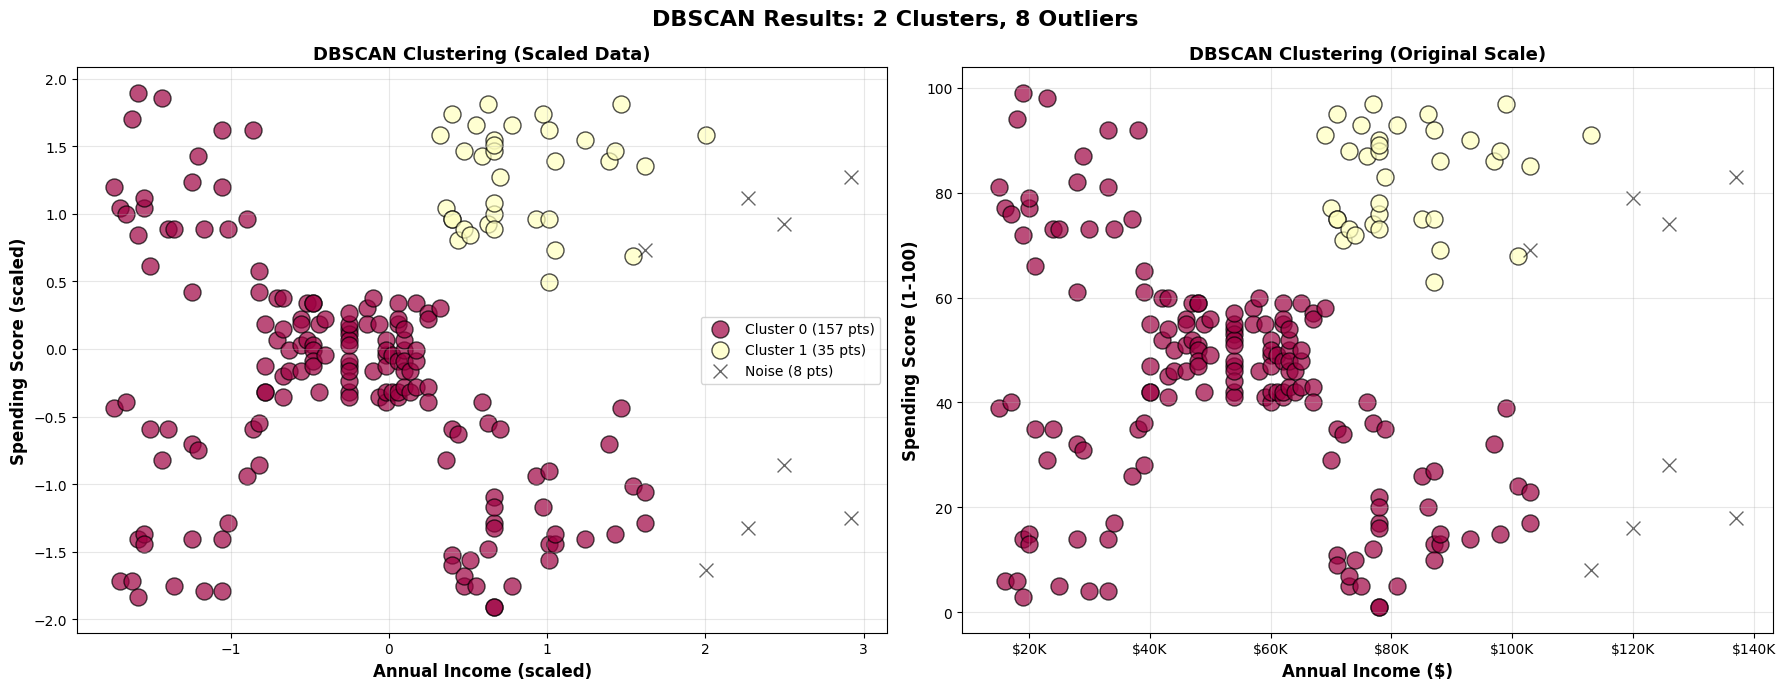


✓ DBSCAN visualization saved as 'dbscan_final_results.png'


In [54]:
# Create comprehensive DBSCAN visualization
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Plot 1: DBSCAN on scaled data
unique_labels = set(dbscan_labels)
colors_dbscan = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors_dbscan):
    if label == -1:
        # Noise points
        color = 'black'
        marker = 'x'
        size = 100
        alpha = 0.6
        label_name = f'Noise ({list(dbscan_labels).count(-1)} pts)'
    else:
        marker = 'o'
        size = 150
        alpha = 0.7
        count = list(dbscan_labels).count(label)
        label_name = f'Cluster {label} ({count} pts)'
    
    mask = dbscan_labels == label
    axes[0].scatter(X_scaled[mask, 0], X_scaled[mask, 1],
                   c=[color], marker=marker, s=size, alpha=alpha,
                   edgecolors='black', linewidths=1,
                   label=label_name)

axes[0].set_xlabel('Annual Income (scaled)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Spending Score (scaled)', fontsize=12, fontweight='bold')
axes[0].set_title('DBSCAN Clustering (Scaled Data)', fontsize=13, fontweight='bold')
axes[0].legend(fontsize=10, loc='best')
axes[0].grid(True, alpha=0.3)

# Plot 2: DBSCAN on original data
for label, color in zip(unique_labels, colors_dbscan):
    if label == -1:
        color = 'black'
        marker = 'x'
        size = 100
        alpha = 0.6
    else:
        marker = 'o'
        size = 150
        alpha = 0.7
    
    mask = dbscan_labels == label
    cluster_data = df[dbscan_labels == label]
    axes[1].scatter(cluster_data['Annual_Income'], 
                   cluster_data['Spending_Score'],
                   c=[color], marker=marker, s=size, alpha=alpha,
                   edgecolors='black', linewidths=1)

axes[1].set_xlabel('Annual Income ($)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Spending Score (1-100)', fontsize=12, fontweight='bold')
axes[1].set_title('DBSCAN Clustering (Original Scale)', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

plt.suptitle(f'DBSCAN Results: {n_clusters_dbscan} Clusters, {n_noise_dbscan} Outliers', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('dbscan_final_results.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ DBSCAN visualization saved as 'dbscan_final_results.png'")


COMPARISON: K-MEANS vs HIERARCHICAL vs DBSCAN


C:\Users\Admin\AppData\Local\Temp\ipykernel_11844\3260566045.py:51: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axes[2].scatter(cluster_data['Annual_Income'],


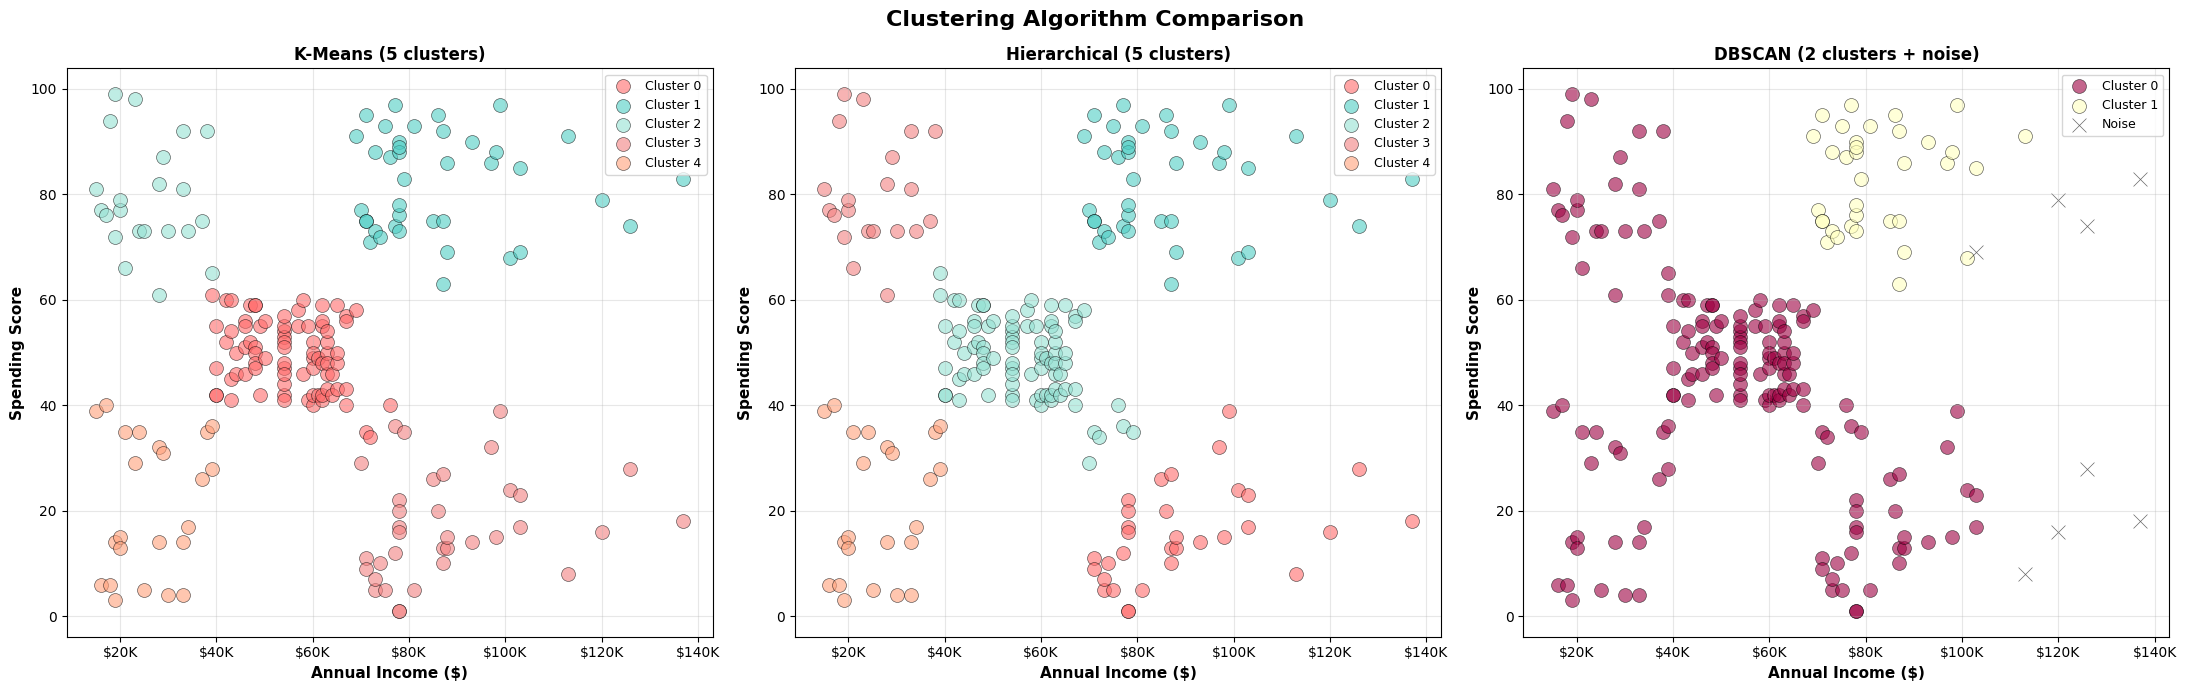


✓ Comparison saved as 'all_algorithms_comparison.png'


In [55]:
# Compare K-Means, Hierarchical, and DBSCAN
print("\n" + "=" * 80)
print("COMPARISON: K-MEANS vs HIERARCHICAL vs DBSCAN")
print("=" * 80)

fig, axes = plt.subplots(1, 3, figsize=(22, 7))

# K-Means
colors_km = ['#FF6B6B', '#4ECDC4', '#95E1D3', '#F38181', '#FFA07A']
for cluster_id in range(5):
    cluster_data = df[df['Cluster'] == cluster_id]
    axes[0].scatter(cluster_data['Annual_Income'], 
                   cluster_data['Spending_Score'],
                   s=100, c=colors_km[cluster_id], 
                   alpha=0.6, edgecolors='black', linewidths=0.5,
                   label=f'Cluster {cluster_id}')
axes[0].set_xlabel('Annual Income ($)', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Spending Score', fontsize=11, fontweight='bold')
axes[0].set_title('K-Means (5 clusters)', fontsize=12, fontweight='bold')
axes[0].legend(fontsize=9)
axes[0].grid(alpha=0.3)
axes[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

# Hierarchical
for cluster_id in range(5):
    cluster_data = df[df['Hierarchical_Cluster'] == cluster_id]
    axes[1].scatter(cluster_data['Annual_Income'], 
                   cluster_data['Spending_Score'],
                   s=100, c=colors_km[cluster_id], 
                   alpha=0.6, edgecolors='black', linewidths=0.5,
                   label=f'Cluster {cluster_id}')
axes[1].set_xlabel('Annual Income ($)', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Spending Score', fontsize=11, fontweight='bold')
axes[1].set_title('Hierarchical (5 clusters)', fontsize=12, fontweight='bold')
axes[1].legend(fontsize=9)
axes[1].grid(alpha=0.3)
axes[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

# DBSCAN
for label, color in zip(unique_labels, colors_dbscan):
    if label == -1:
        color = 'black'
        marker = 'x'
        label_name = 'Noise'
    else:
        marker = 'o'
        label_name = f'Cluster {label}'
    
    mask = dbscan_labels == label
    cluster_data = df[dbscan_labels == label]
    axes[2].scatter(cluster_data['Annual_Income'], 
                   cluster_data['Spending_Score'],
                   c=[color], marker=marker, s=100, alpha=0.6,
                   edgecolors='black', linewidths=0.5,
                   label=label_name)
axes[2].set_xlabel('Annual Income ($)', fontsize=11, fontweight='bold')
axes[2].set_ylabel('Spending Score', fontsize=11, fontweight='bold')
axes[2].set_title(f'DBSCAN ({n_clusters_dbscan} clusters + noise)', fontsize=12, fontweight='bold')
axes[2].legend(fontsize=9)
axes[2].grid(alpha=0.3)
axes[2].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

plt.suptitle('Clustering Algorithm Comparison', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('all_algorithms_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Comparison saved as 'all_algorithms_comparison.png'")